In [1]:
from Extract_ephys_from_struct import ExtractEphysData

In [2]:
# Initialize the class with the path to your .mat file
EED = ExtractEphysData('/Users/cresp1el/Documents/MATLAB/lmc_20ms_data.mat')

stimulation_data = EED.get_stimulation_data() #get stimulation data for all recordings in all groups in a dictionary with unit ids as keys 
converted_data = EED.reorganize_stimulation_data(stimulation_data) #reorganize the stimulation data in a dictionary with group names as keys and lists of dictionaries with unit ids as values

EED.create_trial_intensity_dataframe(converted_data) #create a dataframe with the trial intensity for all recordings in all groups and save it as an attribute of the class

xarrays = EED.create_xarray(converted_data) #create an xarray with the trial intensity for all recordings in all groups and save it as an attribute of the class 

xarrys_ms = EED.convert_sample_to_time(xarrays)
xarrys_ms

Unit ID: 9fc0d2767bd8cd4ae04ad00b6347491b44e8e9553968a155f383c9ee43aee73a
Spike train shape: (999, 45000)
Trial_IDs from dataframes: 0        Trial_1
1        Trial_2
2        Trial_3
3        Trial_4
4        Trial_5
         ...    
994    Trial_995
995    Trial_996
996    Trial_997
997    Trial_998
998    Trial_999
Name: Trial_ID, Length: 999, dtype: object
Unit ID: 69d625b1ee3dd0d024ae59d92baeb60d2eee6295663dbc4d80b58e344681825a
Spike train shape: (999, 45000)
Trial_IDs from dataframes: 0        Trial_1
1        Trial_2
2        Trial_3
3        Trial_4
4        Trial_5
         ...    
994    Trial_995
995    Trial_996
996    Trial_997
997    Trial_998
998    Trial_999
Name: Trial_ID, Length: 999, dtype: object
Unit ID: 9a1b248f29d745b2161ce7b4a356007c485094beb24cd10533e13de7a41469ee
Spike train shape: (999, 45000)
Trial_IDs from dataframes: 0        Trial_1
1        Trial_2
2        Trial_3
3        Trial_4
4        Trial_5
         ...    
994    Trial_995
995    Trial_996
996  

{'9fc0d2767bd8cd4ae04ad00b6347491b44e8e9553968a155f383c9ee43aee73a': <xarray.DataArray (Trial_ID: 999, Time: 1500)>
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])
 Coordinates:
   * Trial_ID  (Trial_ID) object 'Trial_1' 'Trial_2' ... 'Trial_998' 'Trial_999'
   * Time      (Time) float64 0.0 1.001 2.001 ... 1.498e+03 1.499e+03 1.5e+03
 Attributes:
     Intensity:  [2 2 1 1 2 2 2 4 2 1 2 1 1 4 3 4 1 1 1 1 1 3 1 3 1 2 4 2 1 1 ...,
 '69d625b1ee3dd0d024ae59d92baeb60d2eee6295663dbc4d80b58e344681825a': <xarray.DataArray (Trial_ID: 999, Time: 1500)>
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])
 Coordinates:
   * Trial_ID  (Trial_ID) object 'Trial_1' 'Trial_2' ... 'Tri

In [52]:
import xarray as xr


import xarray as xr

import xarray as xr

def extract_spike_counts_per_intensity_in_window(xarrays_dict, window_of_interest_ms):
    """
    Extracts and aggregates spike counts and firing rates from neural data within a specified time window for different stimulation intensities.

    This function processes a dictionary of xarray DataArray objects representing neural spike data. It extracts the spike counts and calculates the firing rates within a specified time window for different stimulus intensities. The stimulus intensities are determined from an attribute in the xarray objects. The extracted data is structured in a nested dictionary format.

    Parameters:
    xarrays_dict (dict): A dictionary where the keys are unit_ids and the values are xarray DataArray objects. Each DataArray object contains neural spike data with dimensions of 'Trial_ID' and 'Time', and an attribute 'Intensity' representing stimulus intensities.
    window_of_interest_ms (tuple): A tuple specifying the start and end of the time window in milliseconds for which the spike counts and firing rates should be extracted.

    Returns:
    dict: A nested dictionary where the outer dictionary has unit_ids as keys and dictionaries as values. The inner dictionaries have stimulus intensities (1 to 4) as keys and lists of tuples as values. Each tuple contains the trial ID (str), the number of spikes in the specified window (int), and the firing rate (float) in spikes per second.

    Usage:
    - Ensure to have a dictionary of xarray DataArray objects with the necessary dimensions and attribute.
    - Specify the time window of interest in milliseconds.
    - Call this function with the dictionary of xarray objects and the time window to get the extracted spike data.

    Example:
    spike_data = extract_spike_counts_per_intensity_in_window(xarrays_dict, (500, 525))
    """
    spike_data = {}

    # Loop through each unit_id in the dictionary
    for unit_id, data in xarrays_dict.items():
        
        # Find the indices of the time dimension corresponding to the specified time window
        time_indices = (data.coords['Time'] >= window_of_interest_ms[0]) & (data.coords['Time'] <= window_of_interest_ms[1])

        # Calculate the duration of the time window in seconds
        window_duration_s = (window_of_interest_ms[1] - window_of_interest_ms[0]) / 1000.0
        
        # Get the intensity attribute as a DataArray
        intensity_dataarray = xr.DataArray(data.attrs['Intensity'], dims='Trial_ID', coords={'Trial_ID': data.coords['Trial_ID']})

        # Initialize a dictionary to store the spike counts and firing rates for different stimulation intensities
        spike_data_per_intensity = {}

        # Loop through each stimulation intensity level
        for intensity in range(1, 5):
            
            # Get the trials corresponding to the current stimulation intensity
            trial_ids = intensity_dataarray[intensity_dataarray == intensity].coords['Trial_ID'].values
            trials = data.sel(Trial_ID=trial_ids)
            
            # Count the number of spikes in the specified time window for each trial and calculate the firing rate
            spike_info = [(trial_id, trial_data.sum().item(), trial_data.sum().item() / window_duration_s) for trial_id, trial_data in zip(trial_ids, trials[:, time_indices])]
            
            # Add the spike info list to the spike_data_per_intensity dictionary with intensity as the key
            spike_data_per_intensity[intensity] = spike_info
        
        # Add the spike data dictionary to the output dictionary
        spike_data[unit_id] = spike_data_per_intensity

    return spike_data



extracted_spiked_for_earlyphase = extract_spike_counts_per_intensity_in_window(xarrys_ms, (500, 525))
extracted_spiked_for_earlyphase['0c46c31c86790ba4e5a40aa6205e0a0b0931294445106f8437eb442c2b4669ac']


{1: [('Trial_9', 0, 0.0),
  ('Trial_10', 0, 0.0),
  ('Trial_11', 0, 0.0),
  ('Trial_13', 0, 0.0),
  ('Trial_16', 0, 0.0),
  ('Trial_19', 1, 40.0),
  ('Trial_22', 0, 0.0),
  ('Trial_23', 0, 0.0),
  ('Trial_25', 0, 0.0),
  ('Trial_26', 0, 0.0),
  ('Trial_31', 0, 0.0),
  ('Trial_43', 0, 0.0),
  ('Trial_44', 0, 0.0),
  ('Trial_46', 0, 0.0),
  ('Trial_52', 0, 0.0),
  ('Trial_57', 0, 0.0),
  ('Trial_58', 0, 0.0),
  ('Trial_64', 1, 40.0),
  ('Trial_70', 0, 0.0),
  ('Trial_73', 0, 0.0),
  ('Trial_80', 0, 0.0),
  ('Trial_83', 1, 40.0),
  ('Trial_88', 0, 0.0),
  ('Trial_91', 0, 0.0),
  ('Trial_93', 0, 0.0),
  ('Trial_98', 0, 0.0),
  ('Trial_102', 0, 0.0),
  ('Trial_107', 0, 0.0),
  ('Trial_108', 0, 0.0),
  ('Trial_110', 0, 0.0),
  ('Trial_115', 0, 0.0),
  ('Trial_116', 0, 0.0),
  ('Trial_124', 0, 0.0),
  ('Trial_126', 0, 0.0),
  ('Trial_128', 0, 0.0),
  ('Trial_131', 0, 0.0),
  ('Trial_133', 0, 0.0),
  ('Trial_139', 0, 0.0),
  ('Trial_146', 0, 0.0),
  ('Trial_162', 0, 0.0),
  ('Trial_165', 0, 0.

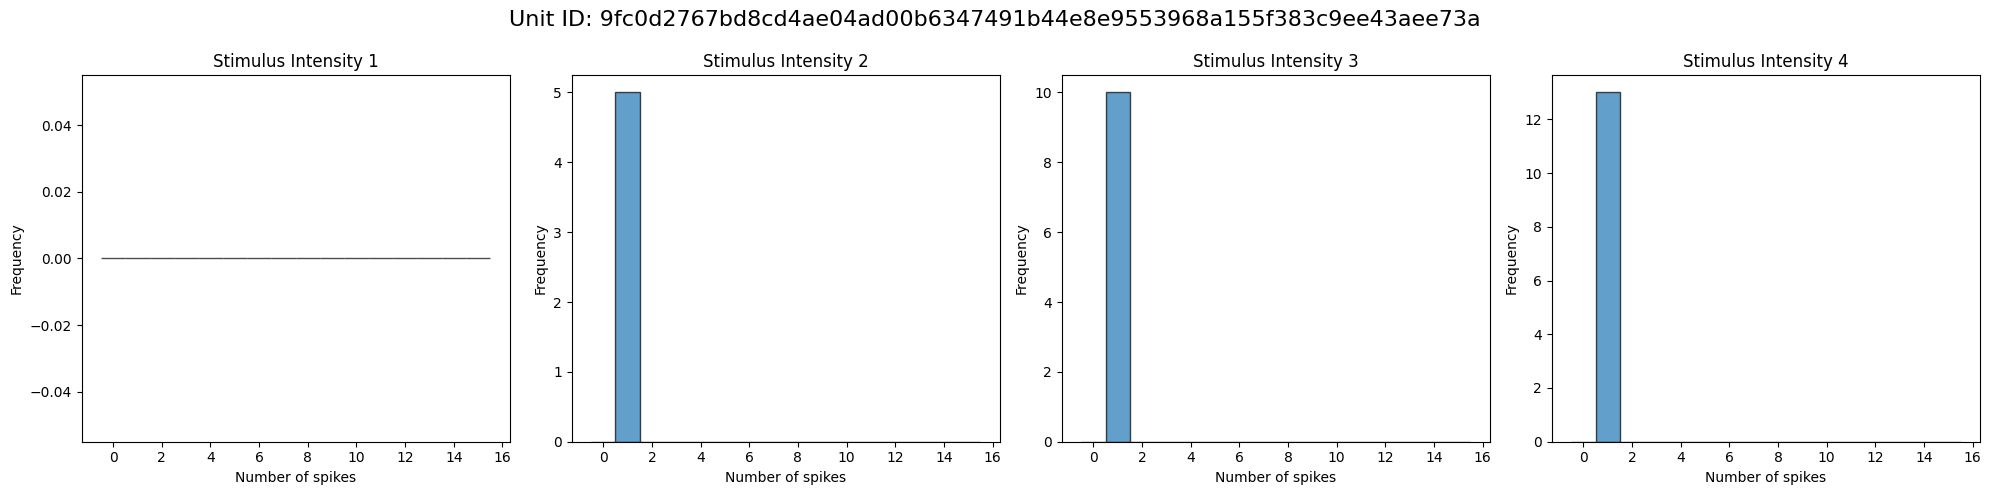

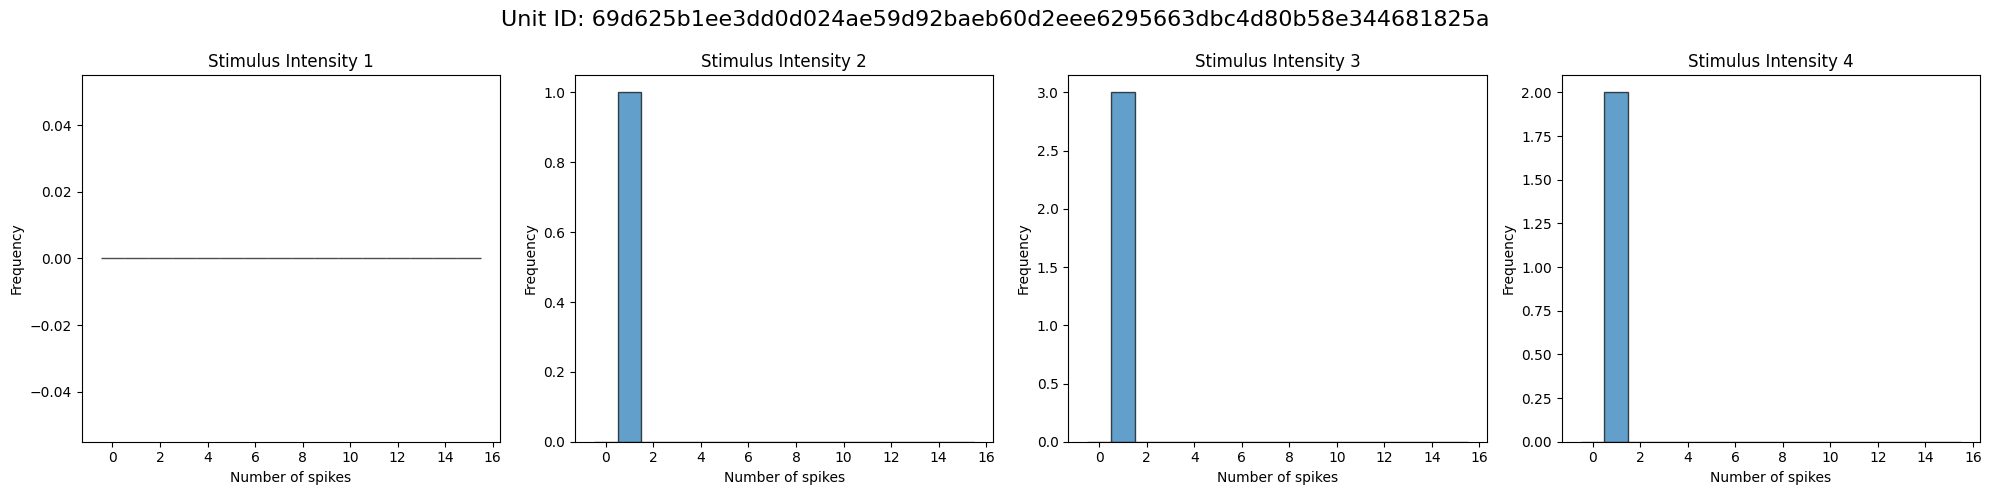

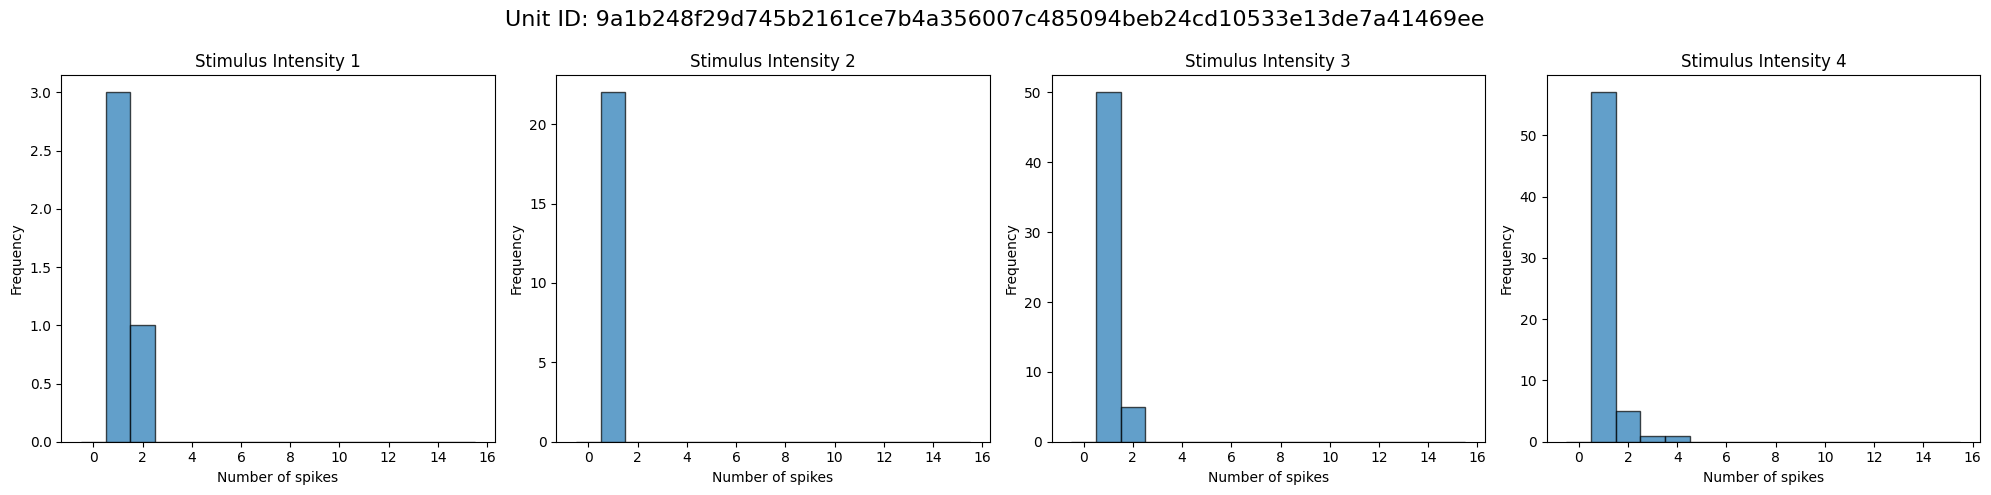

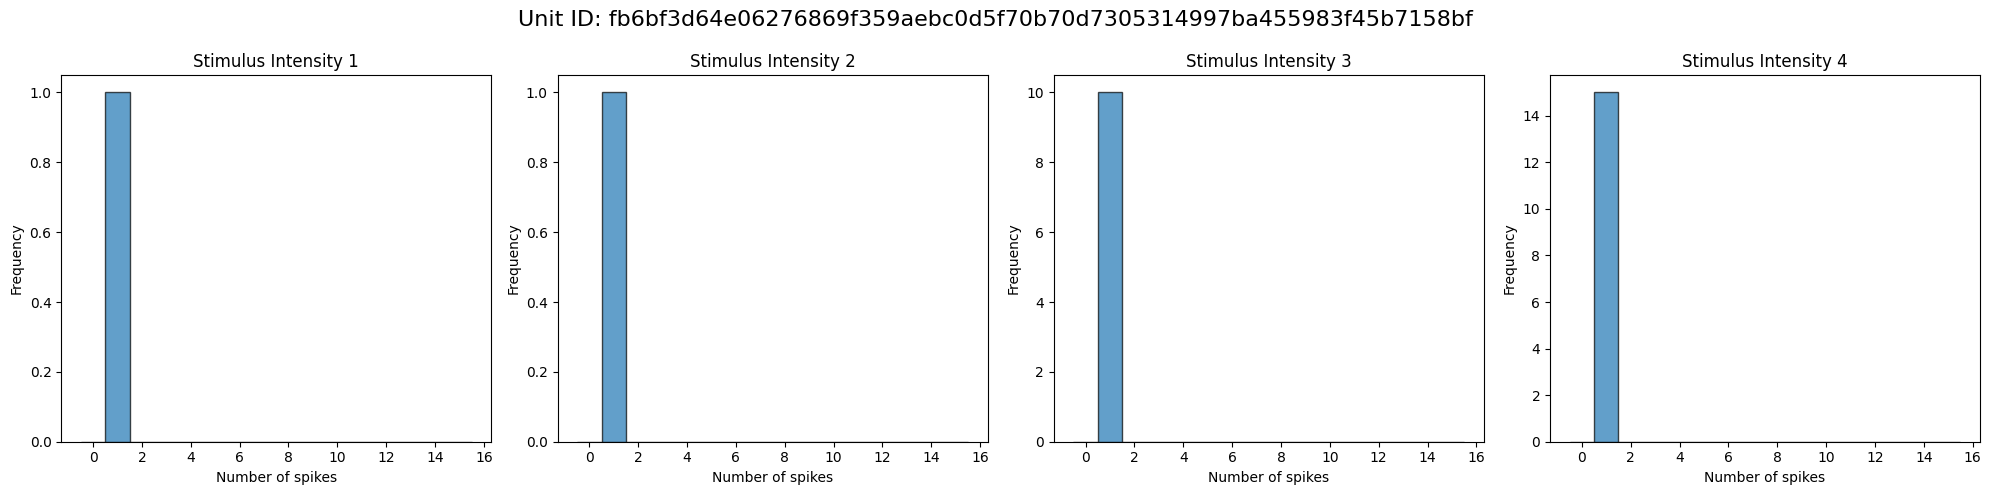

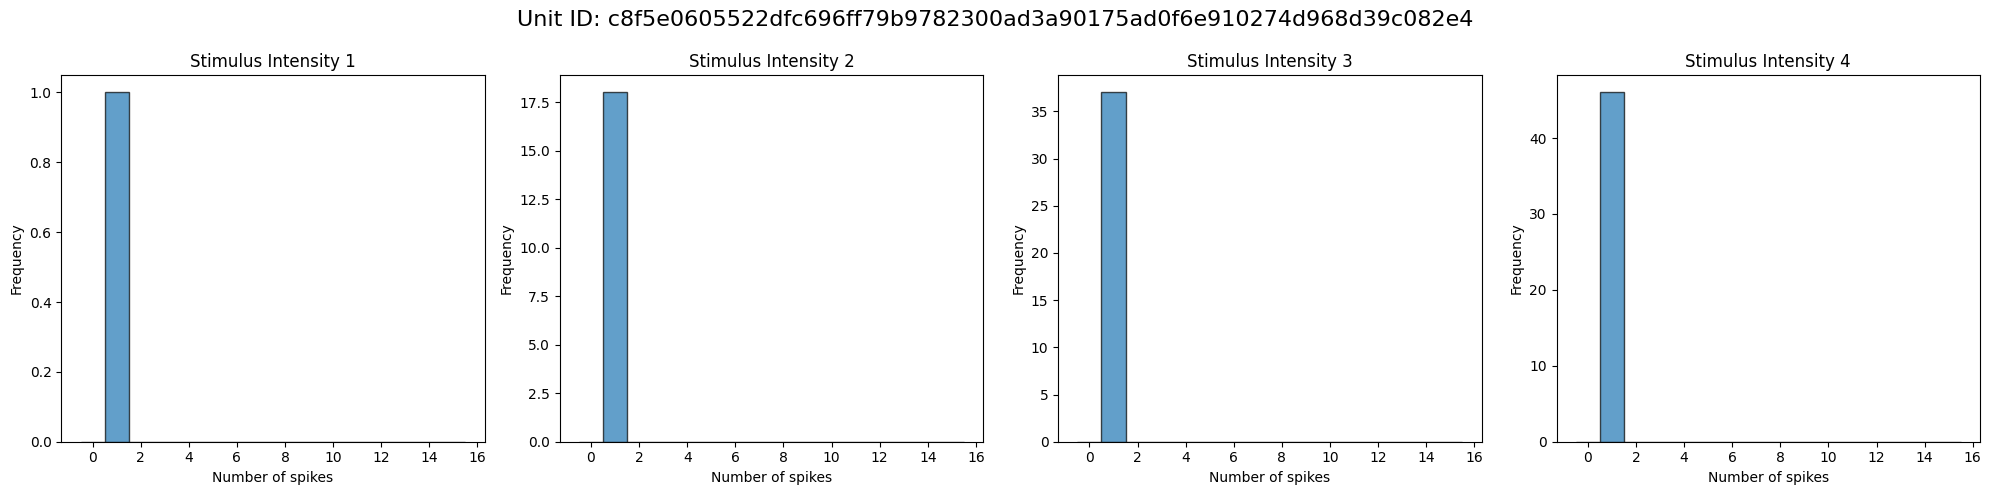

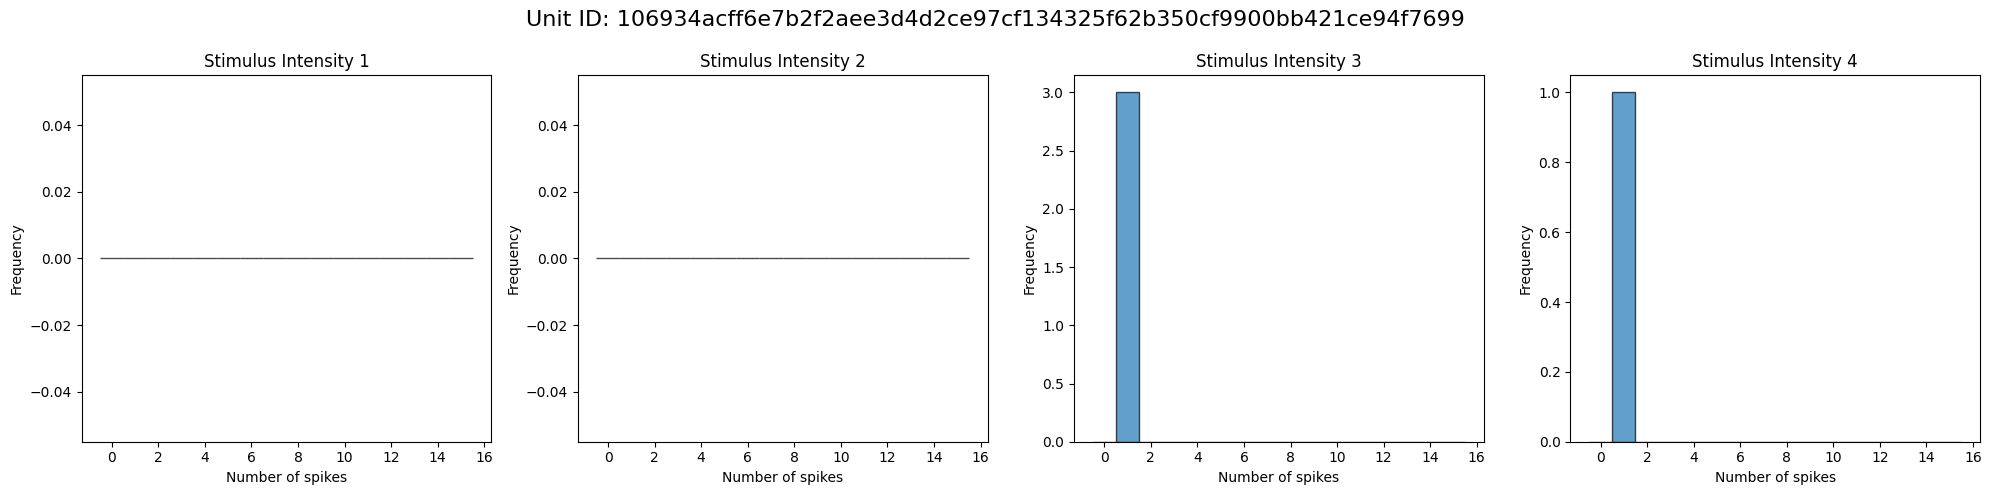

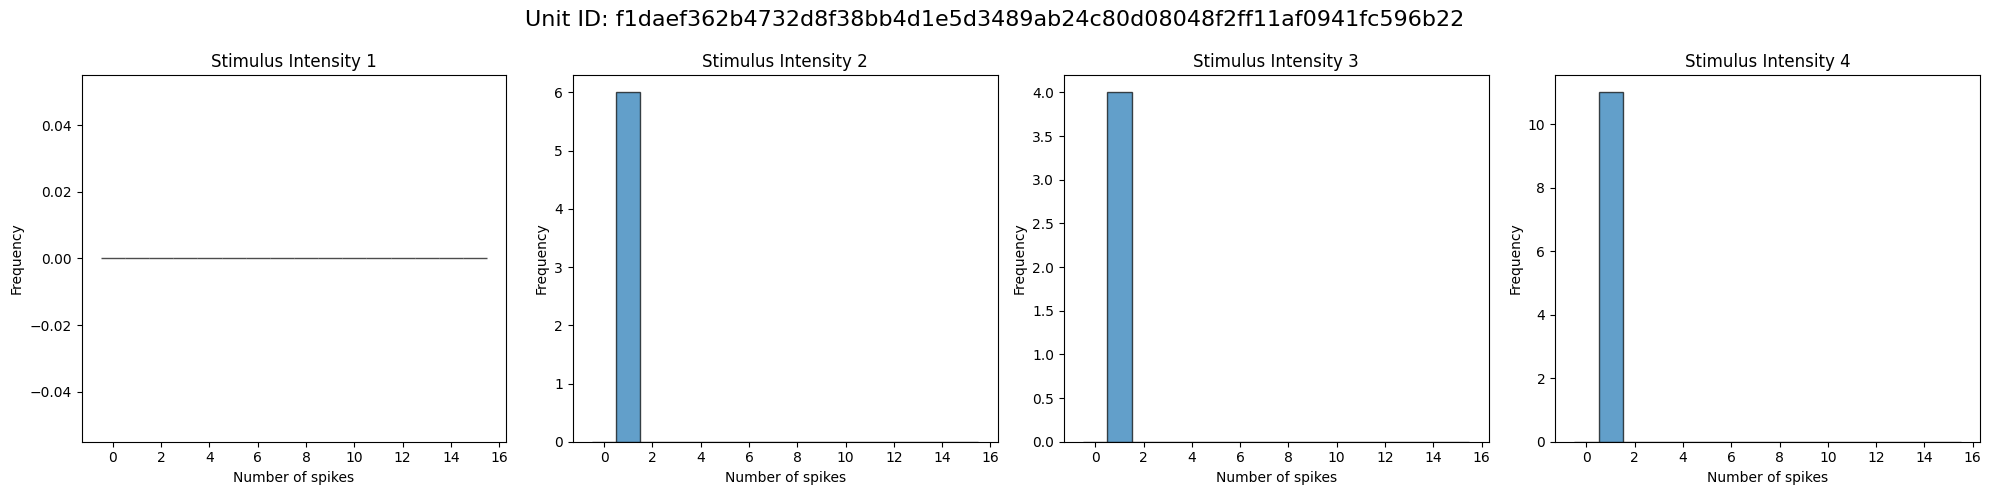

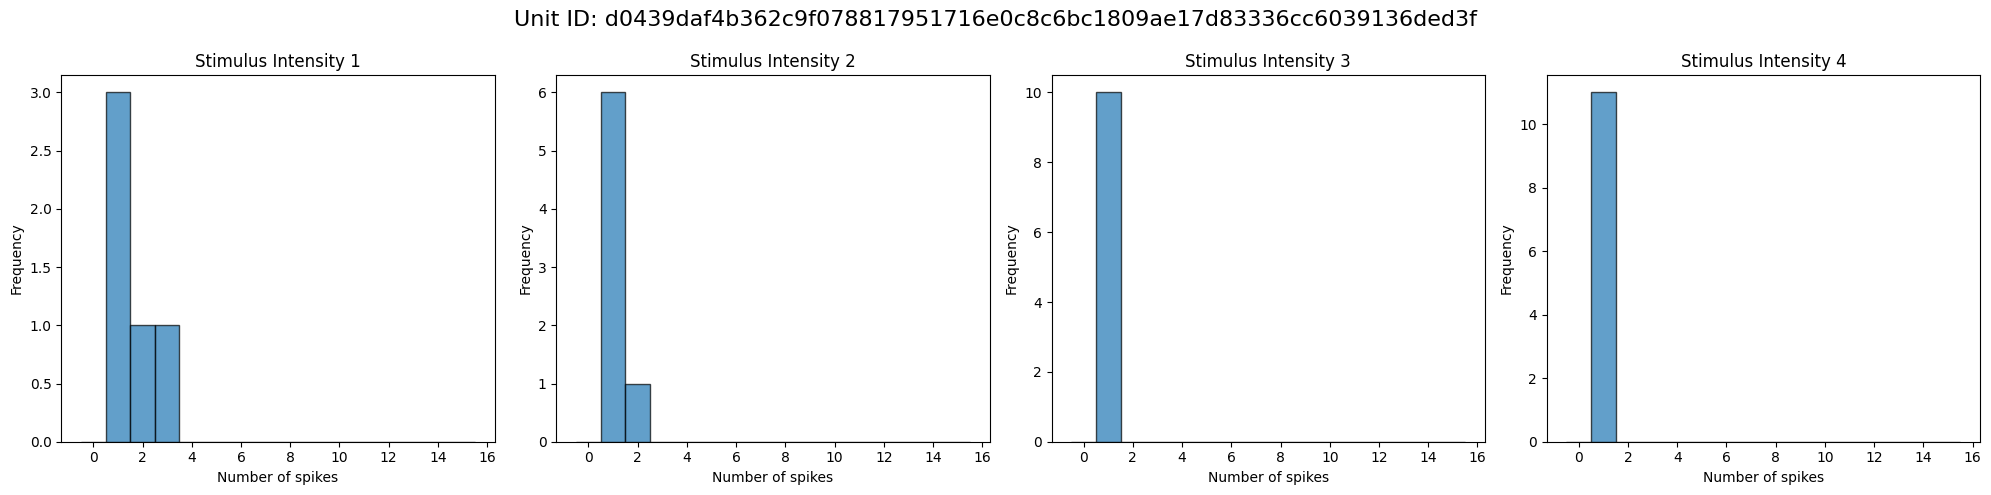

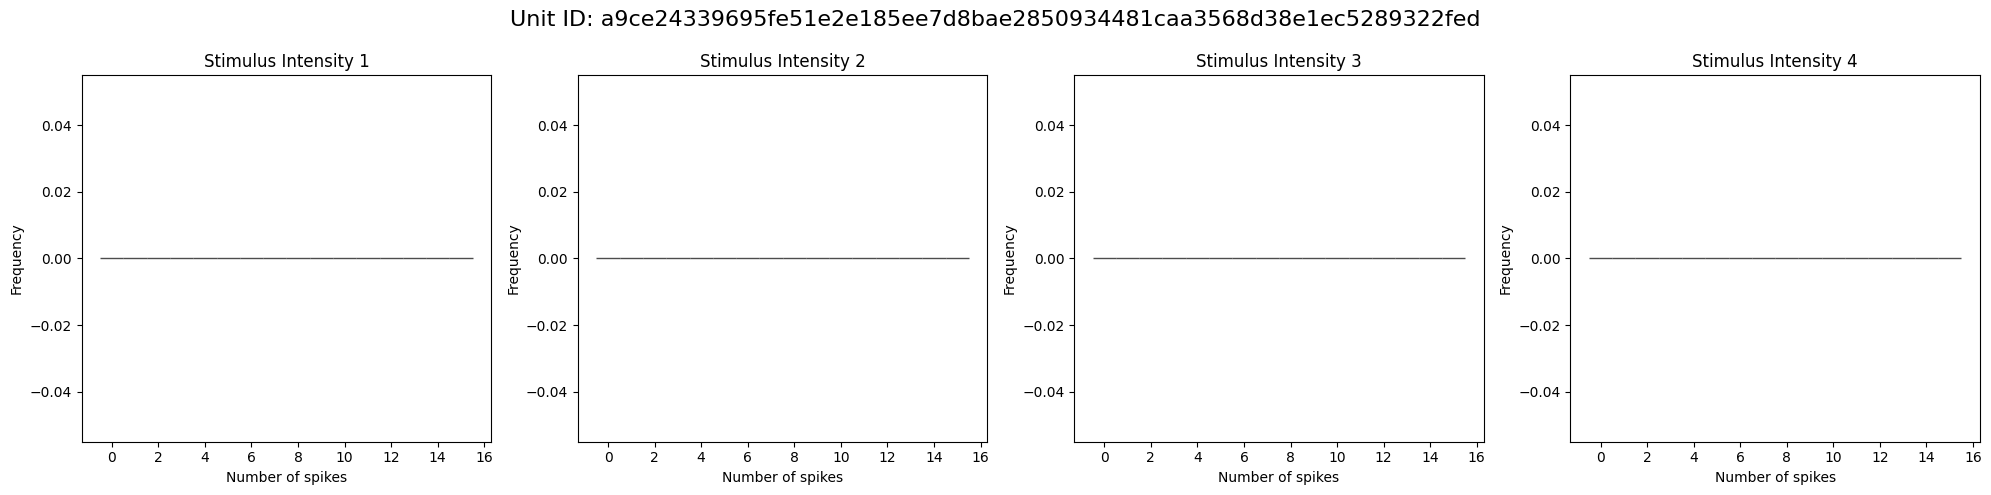

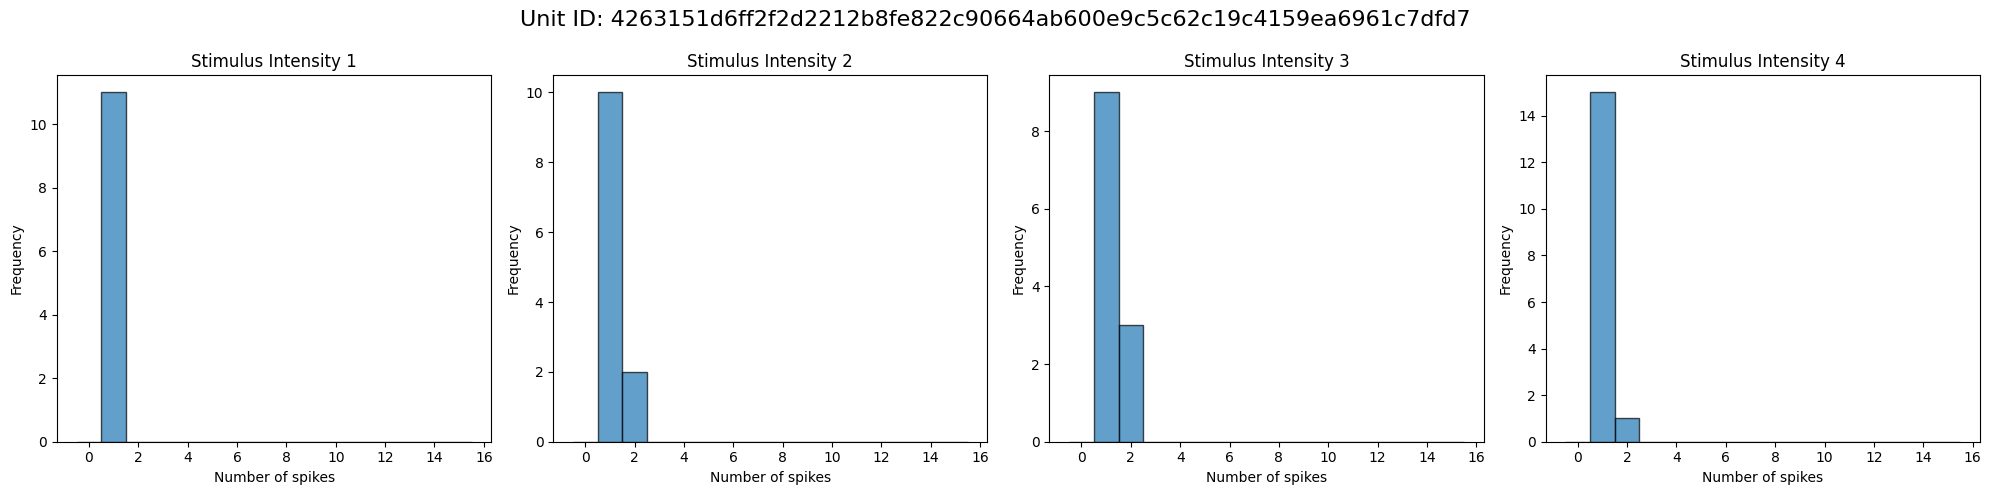

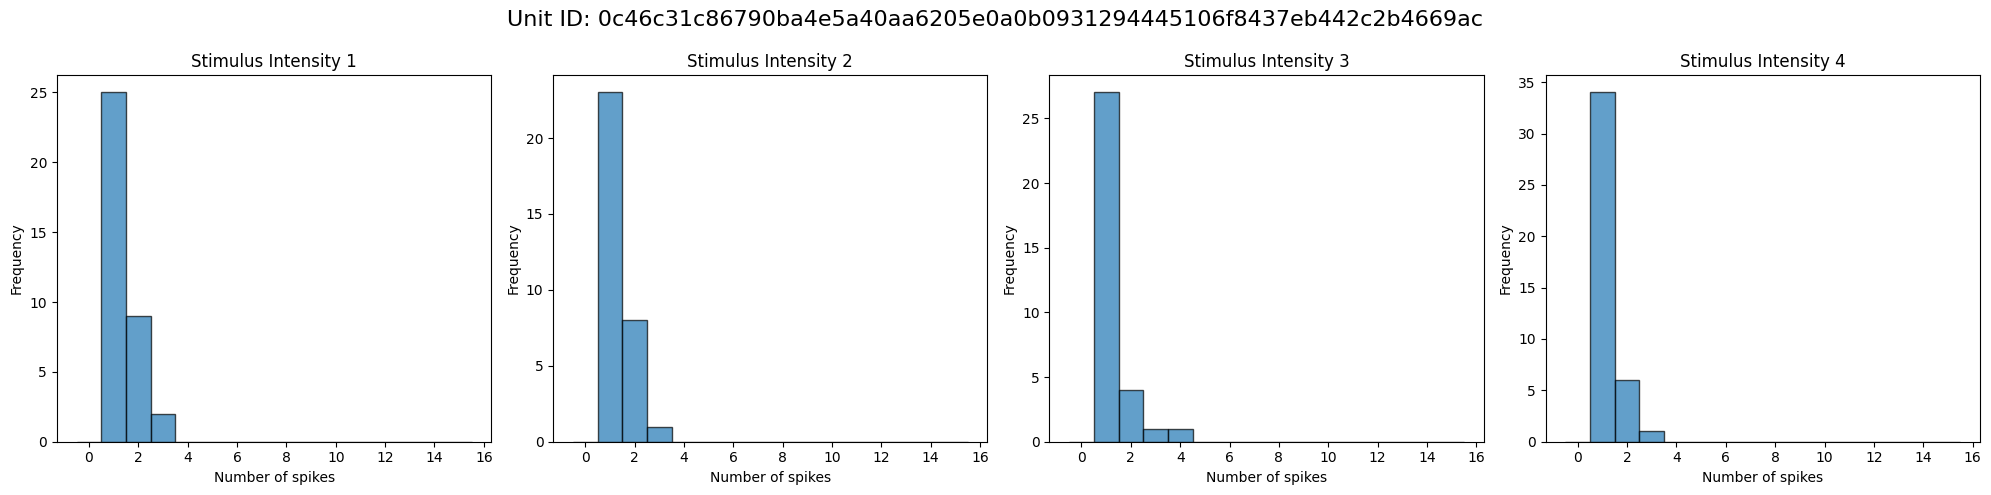

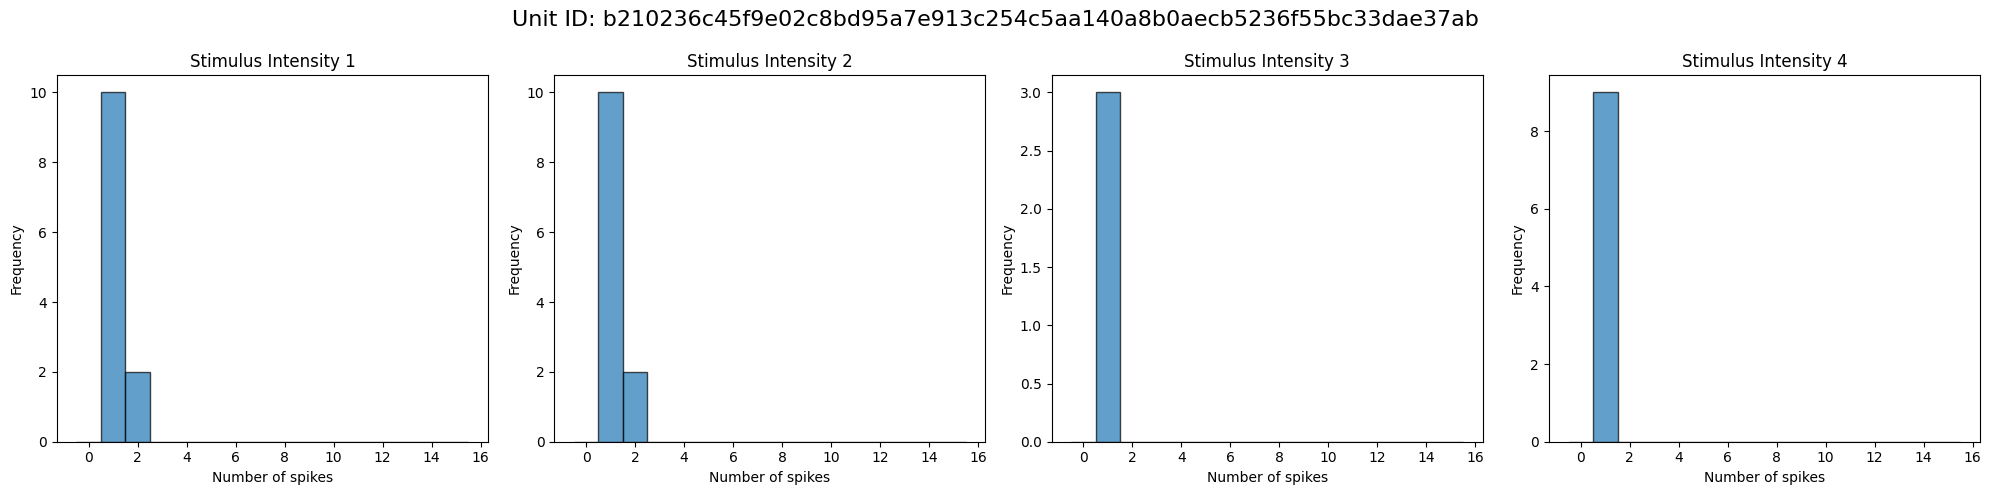

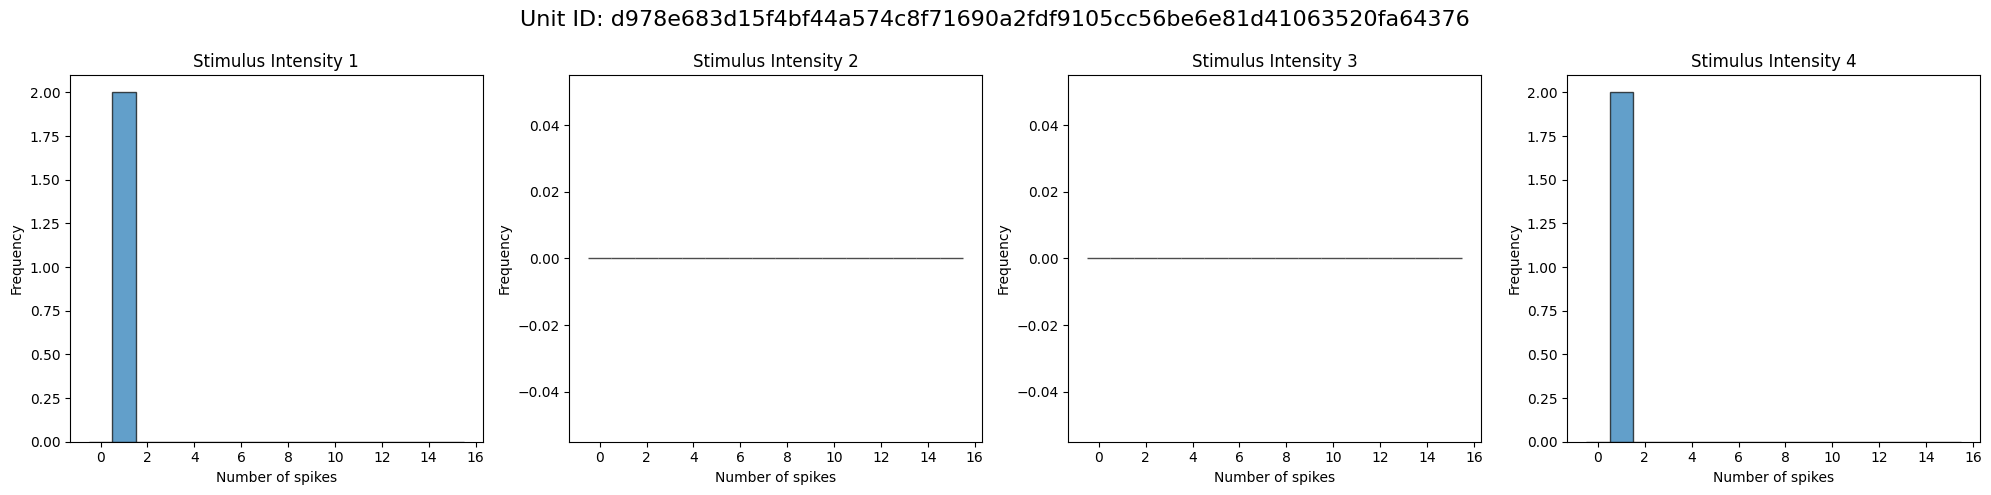

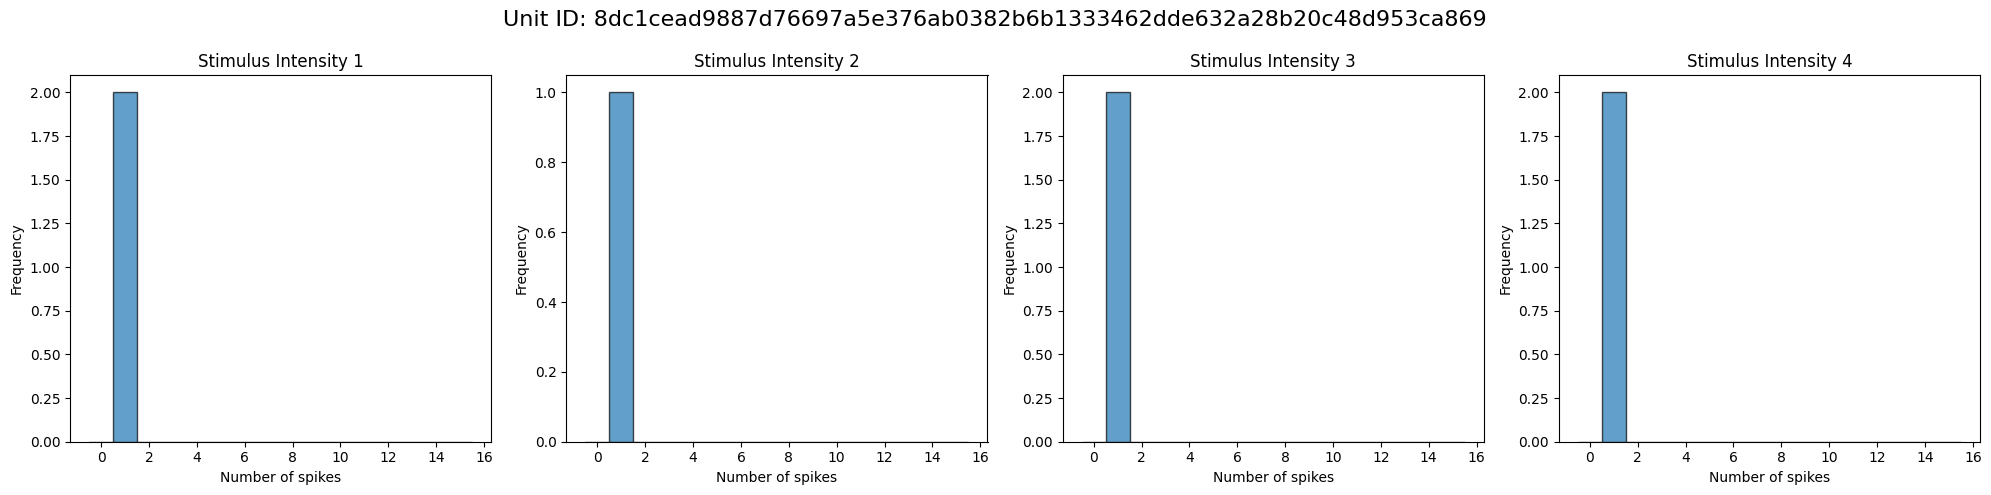

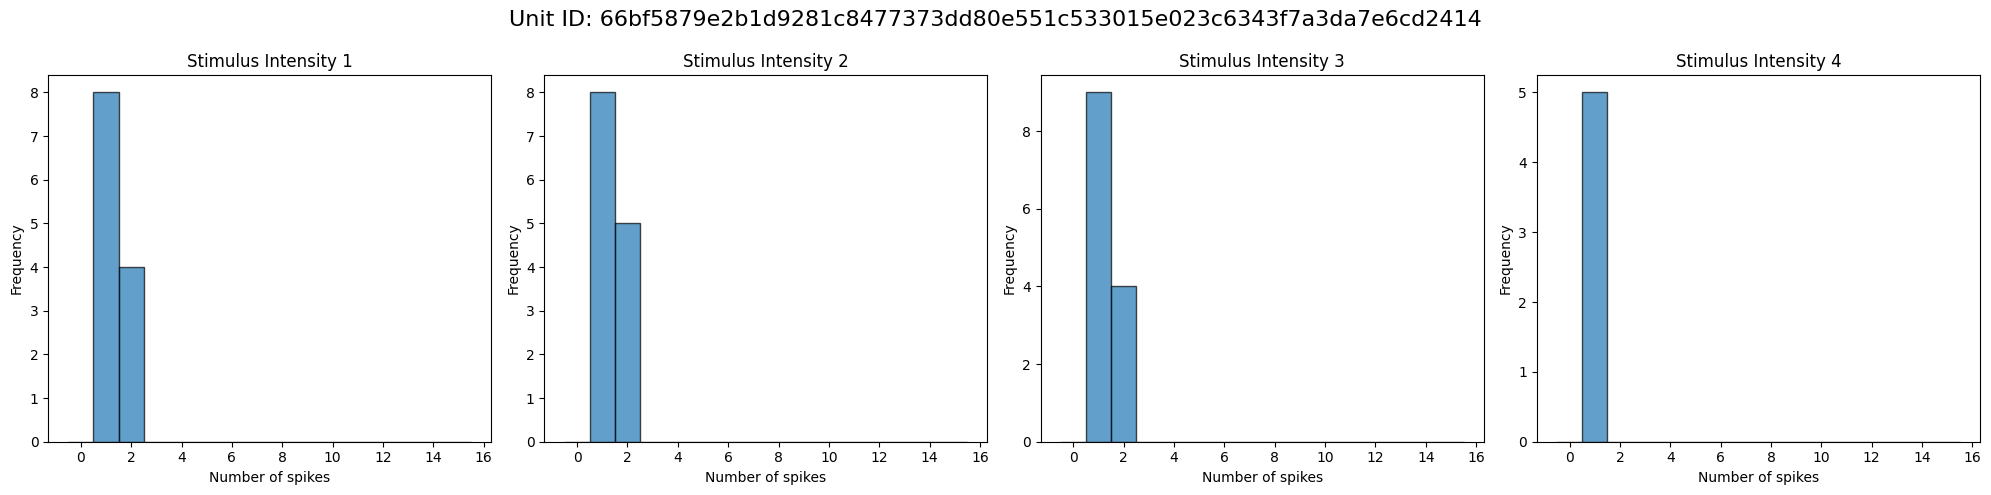

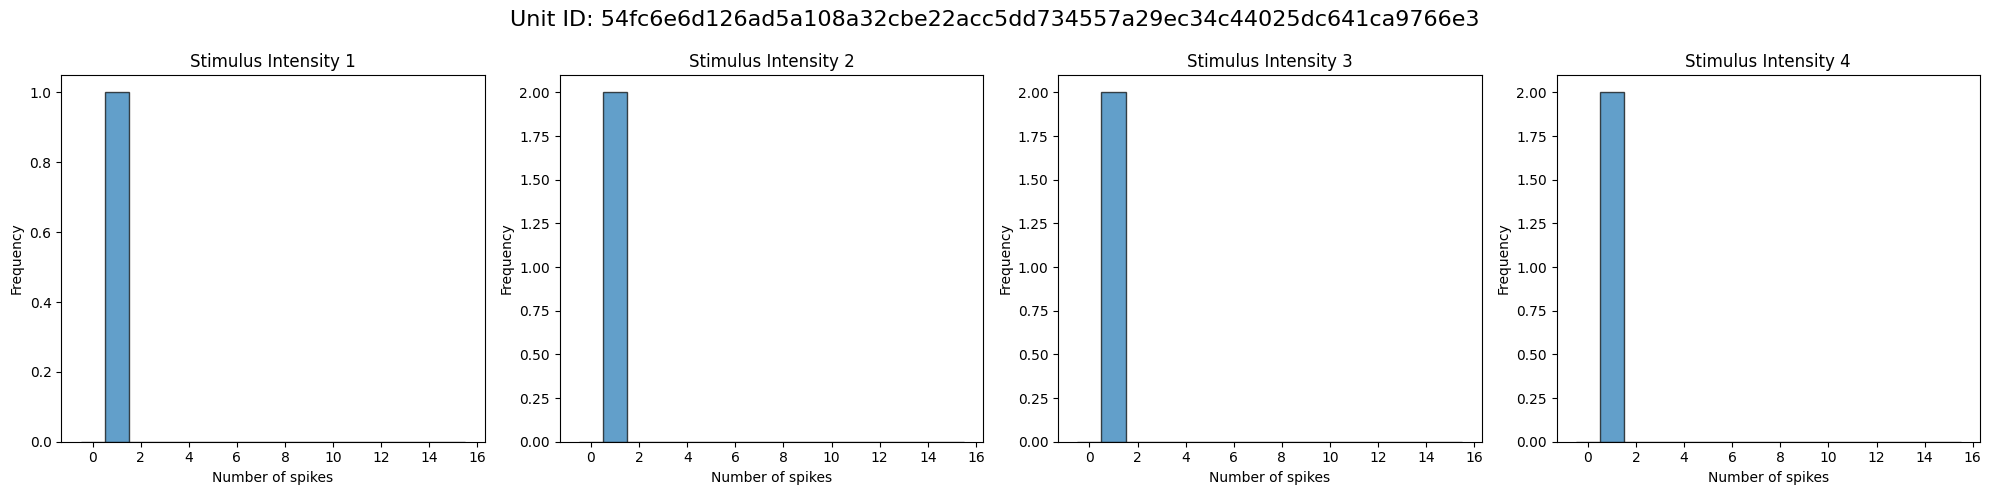

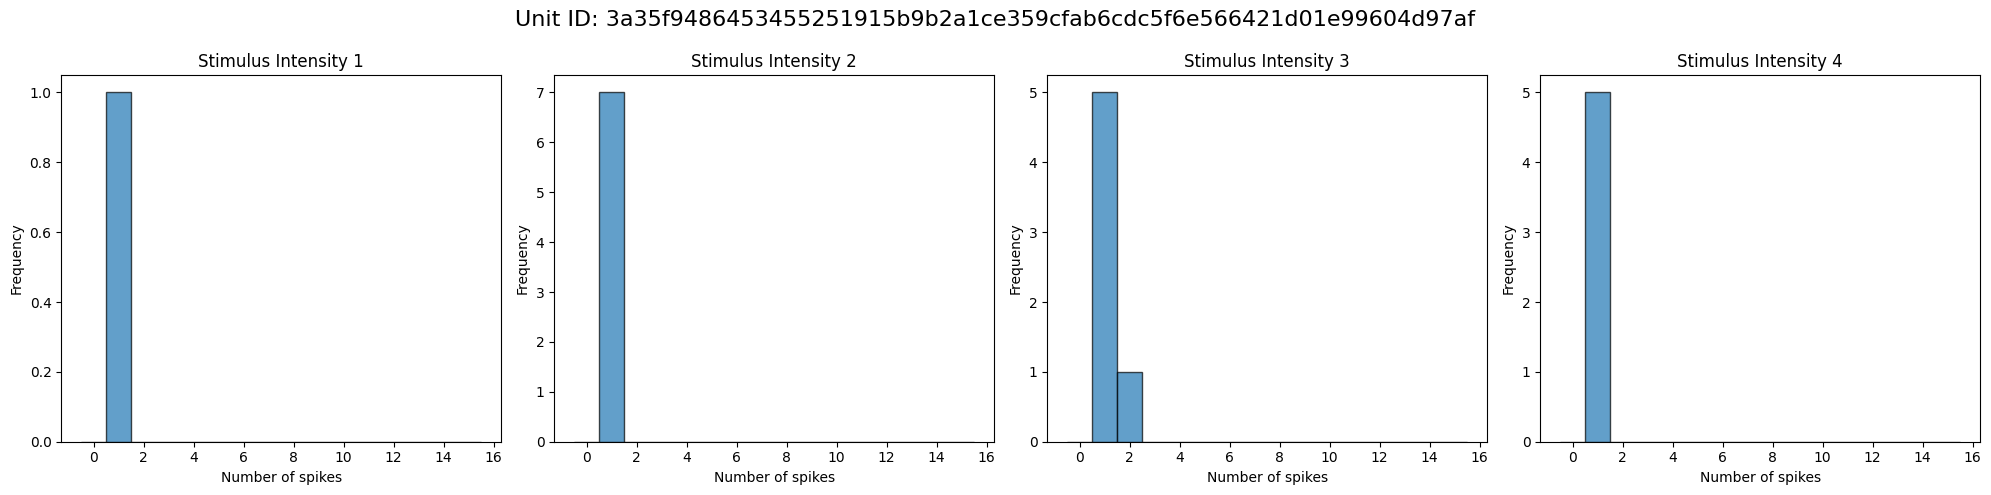

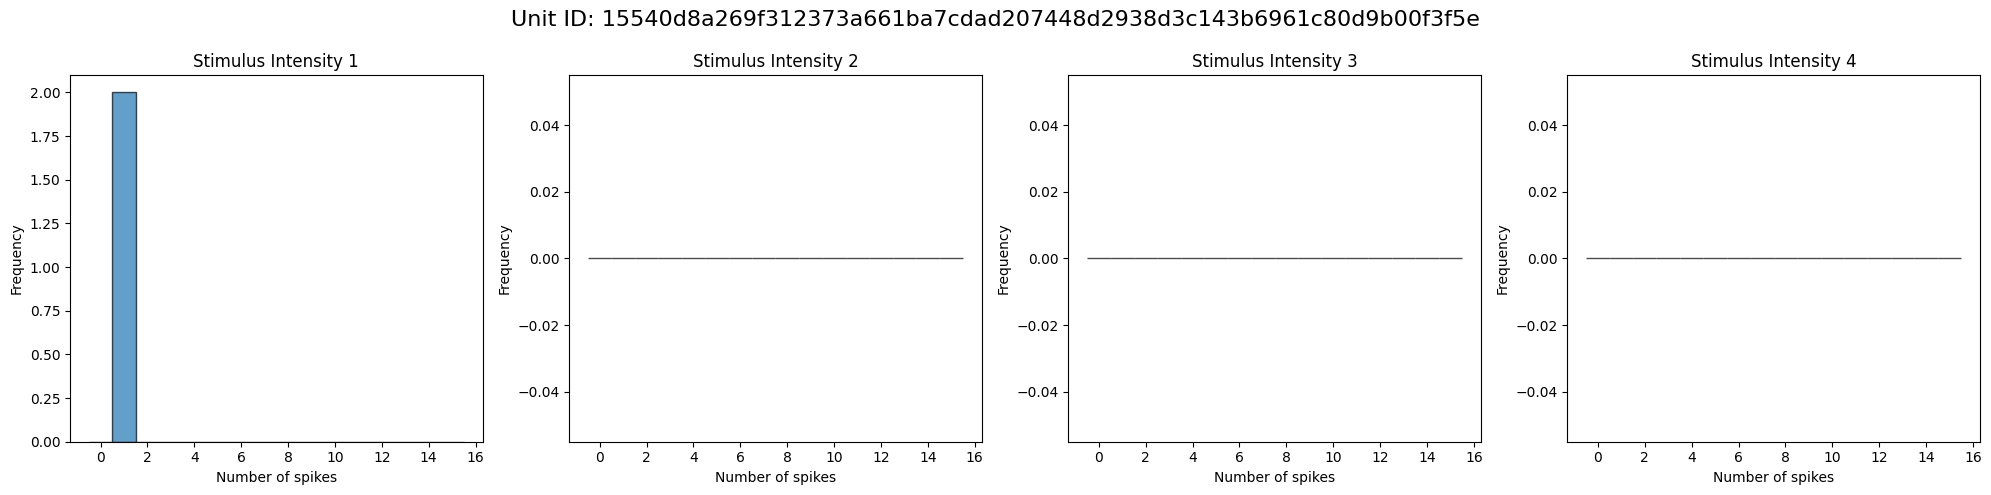

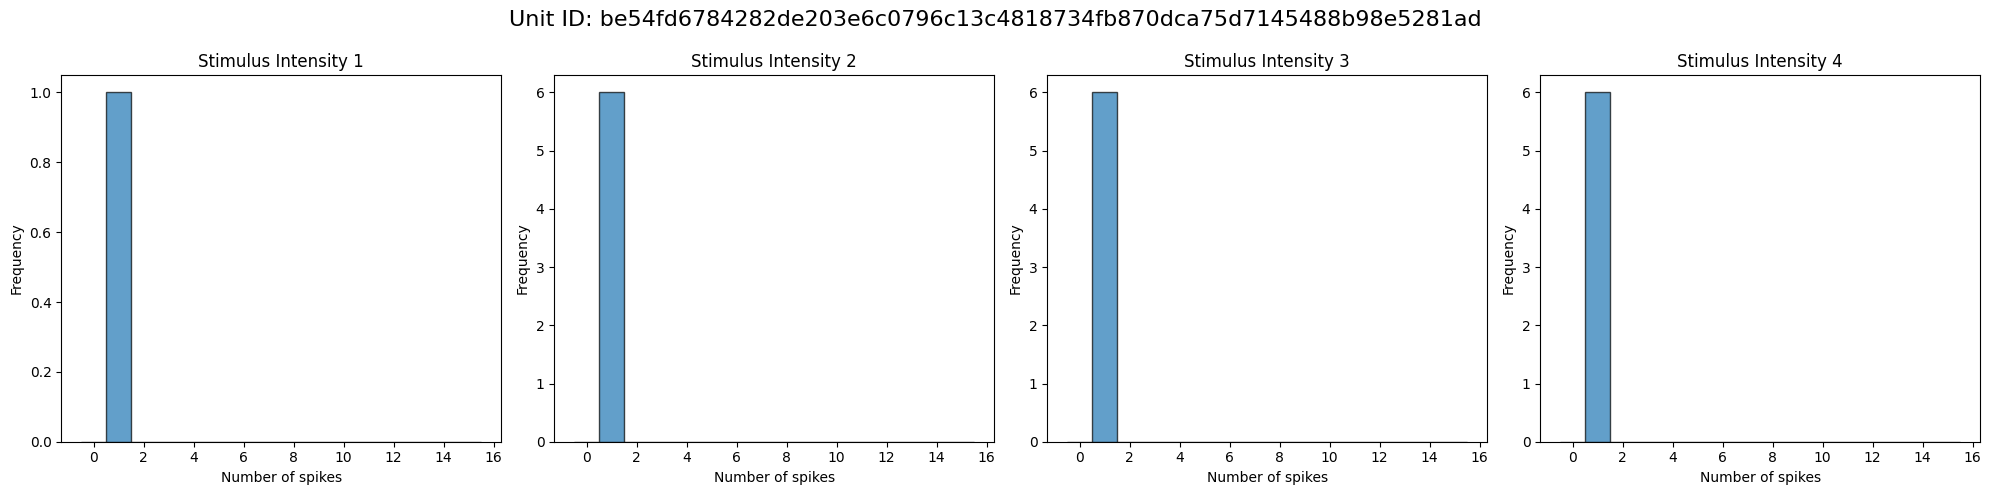

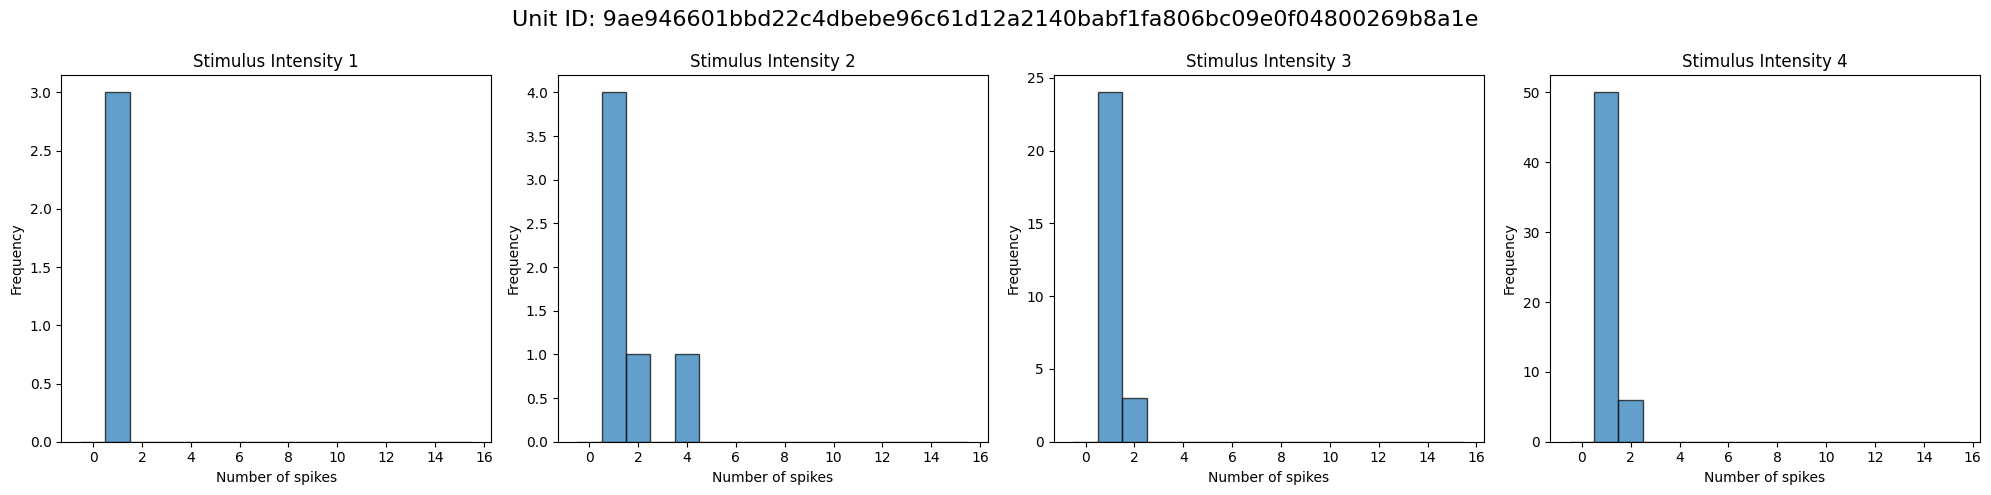

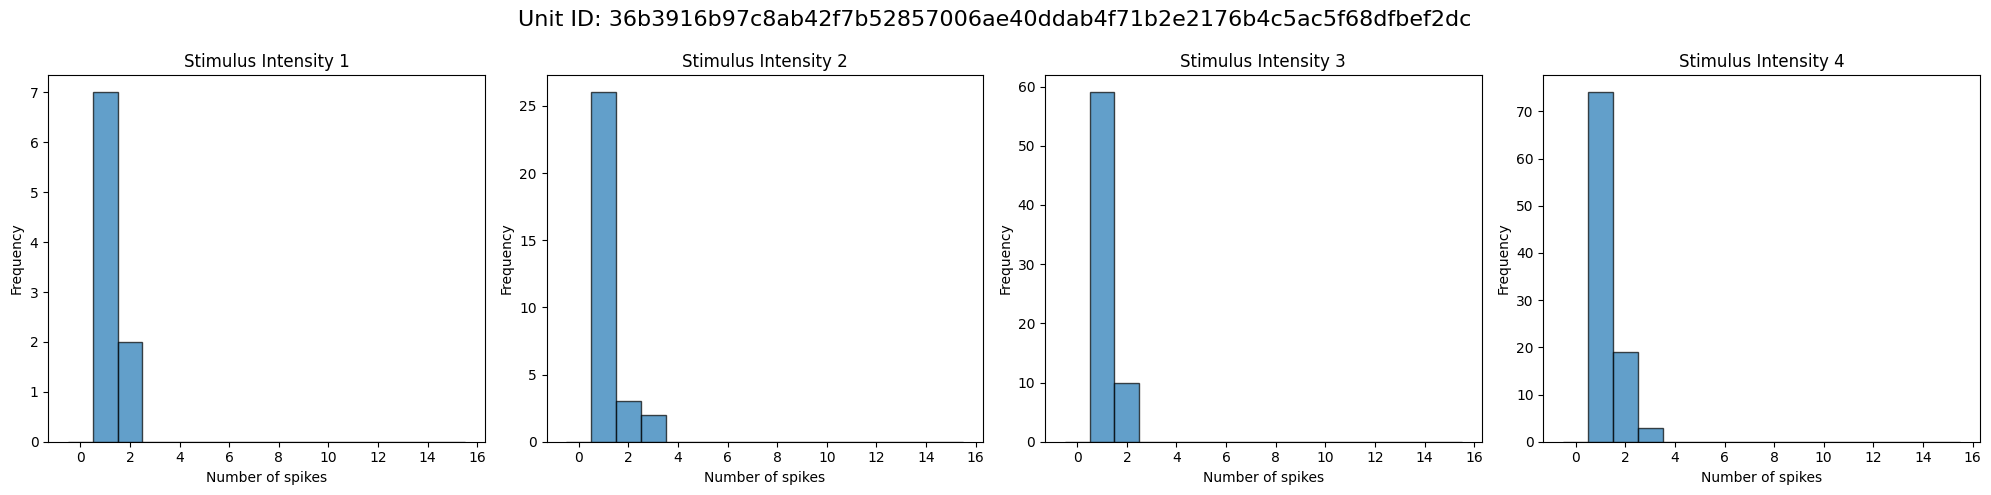

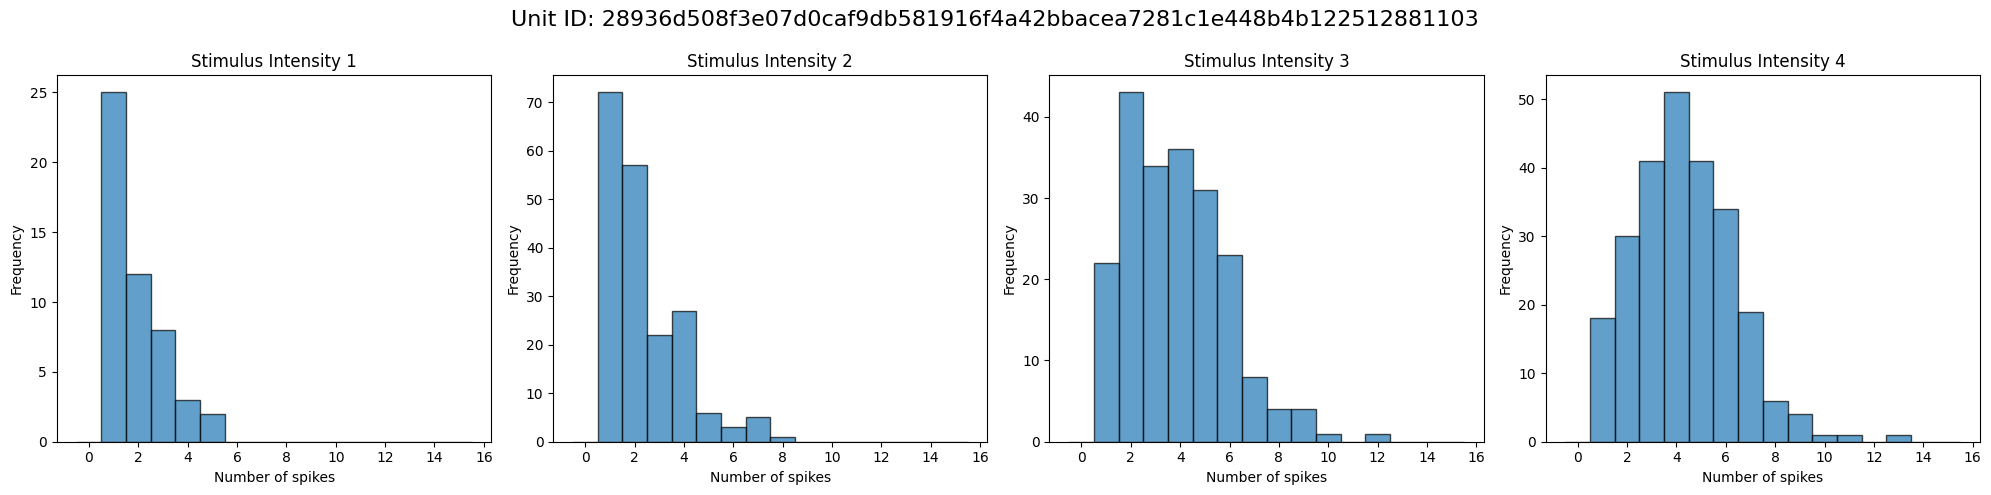

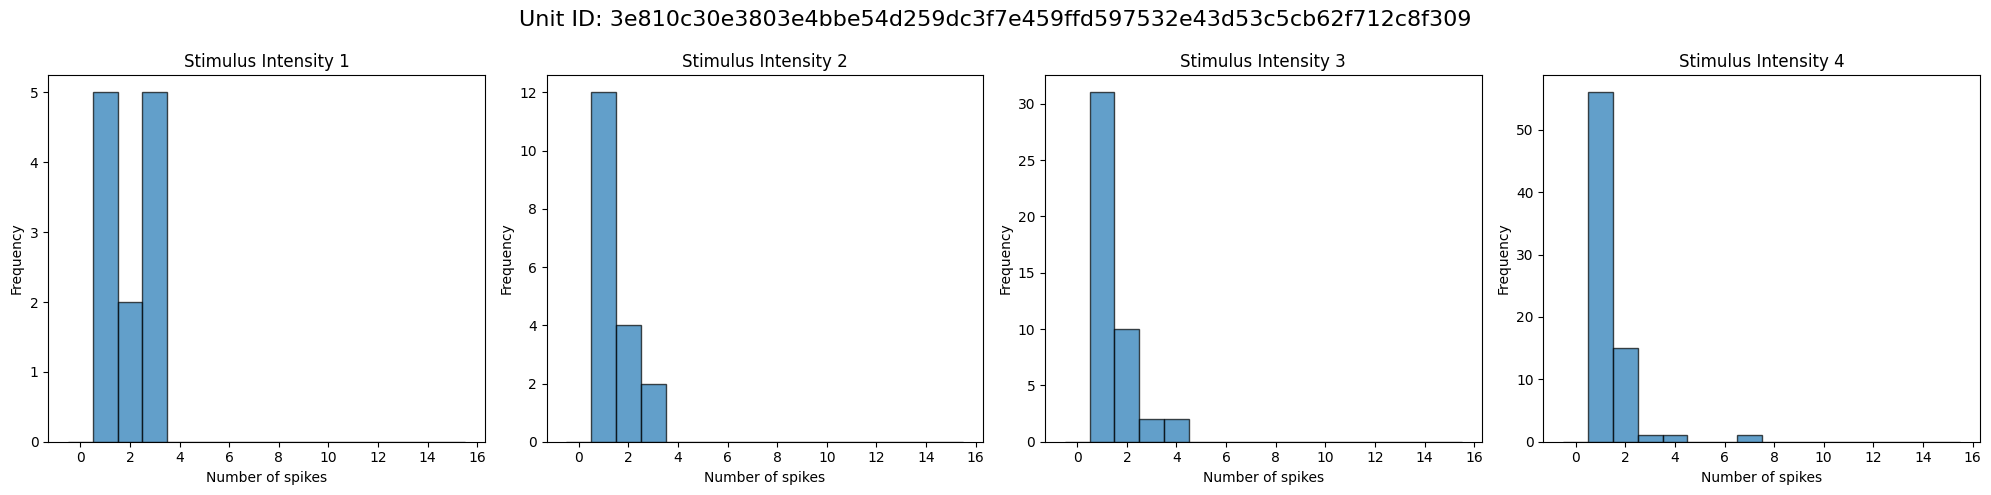

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spike_count_distribution_per_stim_intensity(spike_data, exclude_zeros=False):
    """
    Plot the distribution of spike counts per stimulus intensity in a 1x4 subplot layout.

    This function takes the output of the `extract_spike_data` function, which is a nested dictionary containing spike counts and firing rates per trial, to plot the distribution of spike counts in 1x4 subplot layout for each unit ID present in the spike data dictionary.

    Parameters:
    spike_data (dict): A dictionary with unit_ids as keys and dictionaries as values. The inner dictionary has stimulus intensities (1 to 4) as keys and lists of tuples as values. Each tuple contains the trial ID (str), the number of spikes in the specified window (int), and the firing rate (float) in spikes per second.
    exclude_zeros (bool, optional): A boolean flag to determine whether to exclude zero spike counts from the histograms. Defaults to False, including zero spike counts in the histograms.

    Returns:
    None: This function displays the plots and does not return any values.

    Usage:
    - Ensure to have a dictionary obtained from the `extract_spike_data` function.
    - Call this function with the spike data dictionary and optionally set `exclude_zeros` to True to exclude zero spike counts from the histograms.
    
    Example:
    plot_spike_count_distribution_per_stim_intensity(spike_data, exclude_zeros=True)
    """
    # Loop through each unit_id in the spike data dictionary
    for unit_id, unit_data in spike_data.items():
        
        # Create a 1x4 subplot layout
        fig, axes = plt.subplots(1, 4, figsize=(20, 5))
        
        # Set a main title for the unit_id
        fig.suptitle(f'Unit ID: {unit_id}', fontsize=16)
        
        # Loop through each stimulation intensity level and plot the histogram of spike counts
        for intensity in range(1, 5):
            # Get the spike counts for the current stimulation intensity
            spike_counts = [x[1] for x in unit_data[intensity] if not (exclude_zeros and x[1] == 0)]
            
            # Calculate the histogram using numpy to have exact spike count bins
            hist, bin_edges = np.histogram(spike_counts, bins=range(17))
            
            # Plot the histogram as a bar plot with exact spike count bins
            axes[intensity-1].bar(bin_edges[:-1], hist, width=1, edgecolor='black', alpha=0.7)
            axes[intensity-1].set_title(f'Stimulus Intensity {intensity}')
            axes[intensity-1].set_xlabel('Number of spikes')
            axes[intensity-1].set_ylabel('Frequency')
        
        # Display the plot
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()


plot_spike_count_distribution_per_stim_intensity(extracted_spiked_for_earlyphase, exclude_zeros=True)

In [55]:
xarrys_ms

{'9fc0d2767bd8cd4ae04ad00b6347491b44e8e9553968a155f383c9ee43aee73a': <xarray.DataArray (Trial_ID: 999, Time: 1500)>
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])
 Coordinates:
   * Trial_ID  (Trial_ID) object 'Trial_1' 'Trial_2' ... 'Trial_998' 'Trial_999'
   * Time      (Time) float64 0.0 1.001 2.001 ... 1.498e+03 1.499e+03 1.5e+03
 Attributes:
     Intensity:  [2 2 1 1 2 2 2 4 2 1 2 1 1 4 3 4 1 1 1 1 1 3 1 3 1 2 4 2 1 1 ...,
 '69d625b1ee3dd0d024ae59d92baeb60d2eee6295663dbc4d80b58e344681825a': <xarray.DataArray (Trial_ID: 999, Time: 1500)>
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])
 Coordinates:
   * Trial_ID  (Trial_ID) object 'Trial_1' 'Trial_2' ... 'Tri

In [59]:
import xarray as xr

def extract_conditioned_spike_data(data_dict, window_of_interest_ms):
    """
    Extracts spike counts and firing rates within a specified time window for different conditions.

    Parameters:
    data_dict (dict): A nested dictionary with outer keys being unit IDs and inner keys representing different conditions (combinations of intensity and optionally epoch), and values being xarray DataArrays objects containing the data for those conditions.
    window_of_interest_ms (tuple): A tuple specifying the start and end of the time window in milliseconds for which the spike counts and firing rates should be extracted.

    Returns:
    dict: A nested dictionary where the outer dictionary has unit_ids as keys and dictionaries as values. The inner dictionaries have conditions as keys and lists of tuples as values. Each tuple contains the trial ID (str), the number of spikes in the specified window (int), and the firing rate (float) in spikes per second.
    """
    spike_data = {}

    # Loop through each unit_id in the dictionary
    for unit_id, conditions_data in data_dict.items():

        # Initialize a dictionary to store the spike counts and firing rates for different conditions
        spike_data_per_condition = {}

        # Loop through each condition
        for condition, data in conditions_data.items():
            
            # Find the indices of the time dimension corresponding to the specified time window
            time_indices = (data.coords['Time'] >= window_of_interest_ms[0]) & (data.coords['Time'] <= window_of_interest_ms[1])

            # Calculate the duration of the time window in seconds
            window_duration_s = (window_of_interest_ms[1] - window_of_interest_ms[0]) / 1000.0

            # Get the trial IDs
            trial_ids = data.coords['Trial_ID'].values

            # Count the number of spikes in the specified time window for each trial and calculate the firing rate
            spike_info = [(str(trial_id.values), trial_data.sum().item(), trial_data.sum().item() / window_duration_s) for trial_id, trial_data in zip(data['Trial_ID'], data[:, time_indices])]

            # Add the spike info list to the spike_data_per_condition dictionary with the condition as the key
            spike_data_per_condition[condition] = spike_info

        # Add the spike data dictionary to the output dictionary
        spike_data[unit_id] = spike_data_per_condition

    return spike_data


extracted_spiked_for_earlyphase_cond = extract_conditioned_spike_data(output_test, (500, 525))
extracted_spiked_for_earlyphase_cond['0c46c31c86790ba4e5a40aa6205e0a0b0931294445106f8437eb442c2b4669ac']


{'Zero_Pre': [('Trial_9', 0, 0.0),
  ('Trial_10', 0, 0.0),
  ('Trial_11', 0, 0.0),
  ('Trial_13', 0, 0.0),
  ('Trial_16', 0, 0.0),
  ('Trial_19', 1, 40.0),
  ('Trial_22', 0, 0.0),
  ('Trial_23', 0, 0.0),
  ('Trial_25', 0, 0.0),
  ('Trial_26', 0, 0.0),
  ('Trial_31', 0, 0.0),
  ('Trial_43', 0, 0.0),
  ('Trial_44', 0, 0.0),
  ('Trial_46', 0, 0.0),
  ('Trial_52', 0, 0.0),
  ('Trial_57', 0, 0.0),
  ('Trial_58', 0, 0.0),
  ('Trial_64', 1, 40.0),
  ('Trial_70', 0, 0.0),
  ('Trial_73', 0, 0.0),
  ('Trial_80', 0, 0.0),
  ('Trial_83', 1, 40.0),
  ('Trial_88', 0, 0.0),
  ('Trial_91', 0, 0.0),
  ('Trial_93', 0, 0.0),
  ('Trial_98', 0, 0.0),
  ('Trial_102', 0, 0.0),
  ('Trial_107', 0, 0.0),
  ('Trial_108', 0, 0.0),
  ('Trial_110', 0, 0.0),
  ('Trial_115', 0, 0.0),
  ('Trial_116', 0, 0.0),
  ('Trial_124', 0, 0.0),
  ('Trial_126', 0, 0.0),
  ('Trial_128', 0, 0.0),
  ('Trial_131', 0, 0.0),
  ('Trial_133', 0, 0.0),
  ('Trial_139', 0, 0.0),
  ('Trial_146', 0, 0.0),
  ('Trial_162', 0, 0.0),
  ('Trial_16

In [60]:
extracted_spiked_for_earlyphase_cond

{'9fc0d2767bd8cd4ae04ad00b6347491b44e8e9553968a155f383c9ee43aee73a': {'Zero_Pre': [('Trial_3',
    0,
    0.0),
   ('Trial_4', 0, 0.0),
   ('Trial_10', 0, 0.0),
   ('Trial_12', 0, 0.0),
   ('Trial_13', 0, 0.0),
   ('Trial_17', 0, 0.0),
   ('Trial_18', 0, 0.0),
   ('Trial_19', 0, 0.0),
   ('Trial_20', 0, 0.0),
   ('Trial_21', 0, 0.0),
   ('Trial_23', 0, 0.0),
   ('Trial_25', 0, 0.0),
   ('Trial_29', 0, 0.0),
   ('Trial_30', 0, 0.0),
   ('Trial_32', 0, 0.0),
   ('Trial_38', 0, 0.0),
   ('Trial_45', 0, 0.0),
   ('Trial_50', 0, 0.0),
   ('Trial_52', 0, 0.0),
   ('Trial_53', 0, 0.0),
   ('Trial_60', 0, 0.0),
   ('Trial_63', 0, 0.0),
   ('Trial_69', 0, 0.0),
   ('Trial_74', 0, 0.0),
   ('Trial_79', 0, 0.0),
   ('Trial_88', 0, 0.0),
   ('Trial_94', 0, 0.0),
   ('Trial_96', 0, 0.0),
   ('Trial_98', 0, 0.0),
   ('Trial_99', 0, 0.0),
   ('Trial_104', 0, 0.0),
   ('Trial_111', 0, 0.0),
   ('Trial_113', 0, 0.0),
   ('Trial_116', 0, 0.0),
   ('Trial_117', 0, 0.0),
   ('Trial_119', 0, 0.0),
   ('Tri

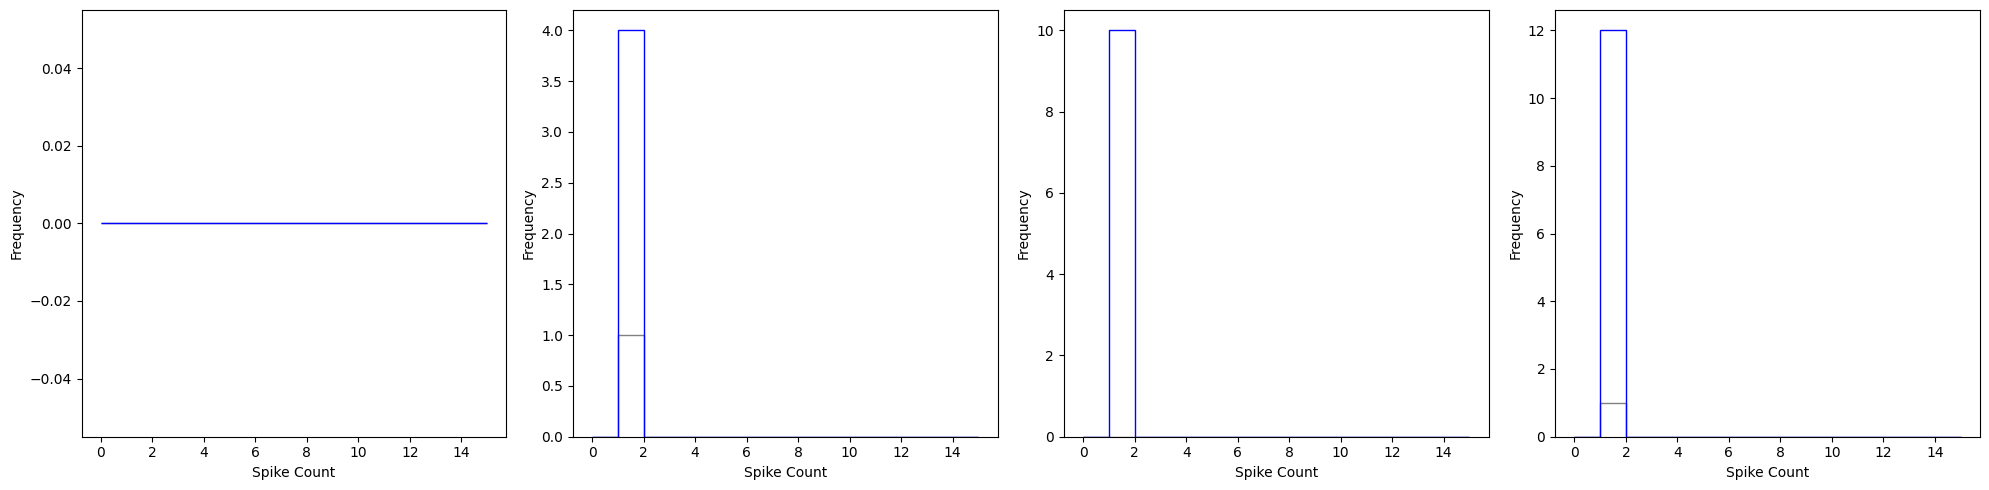

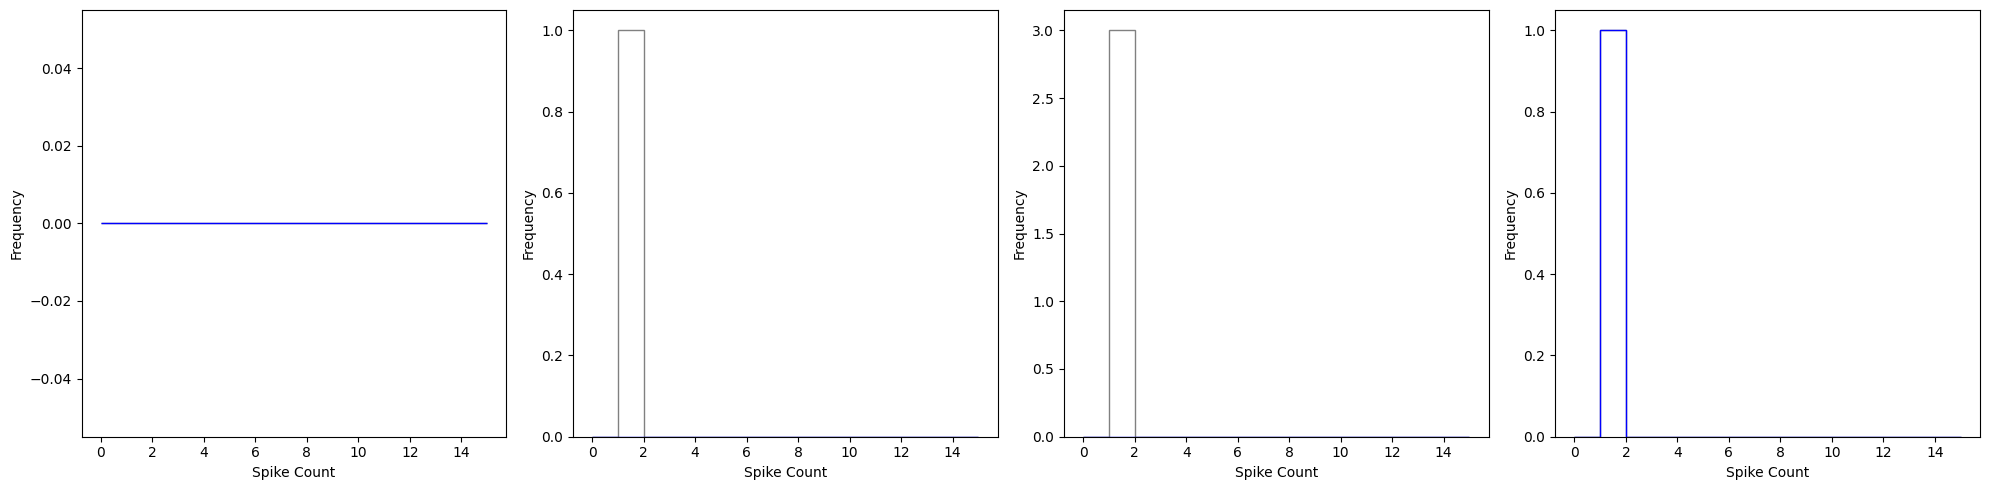

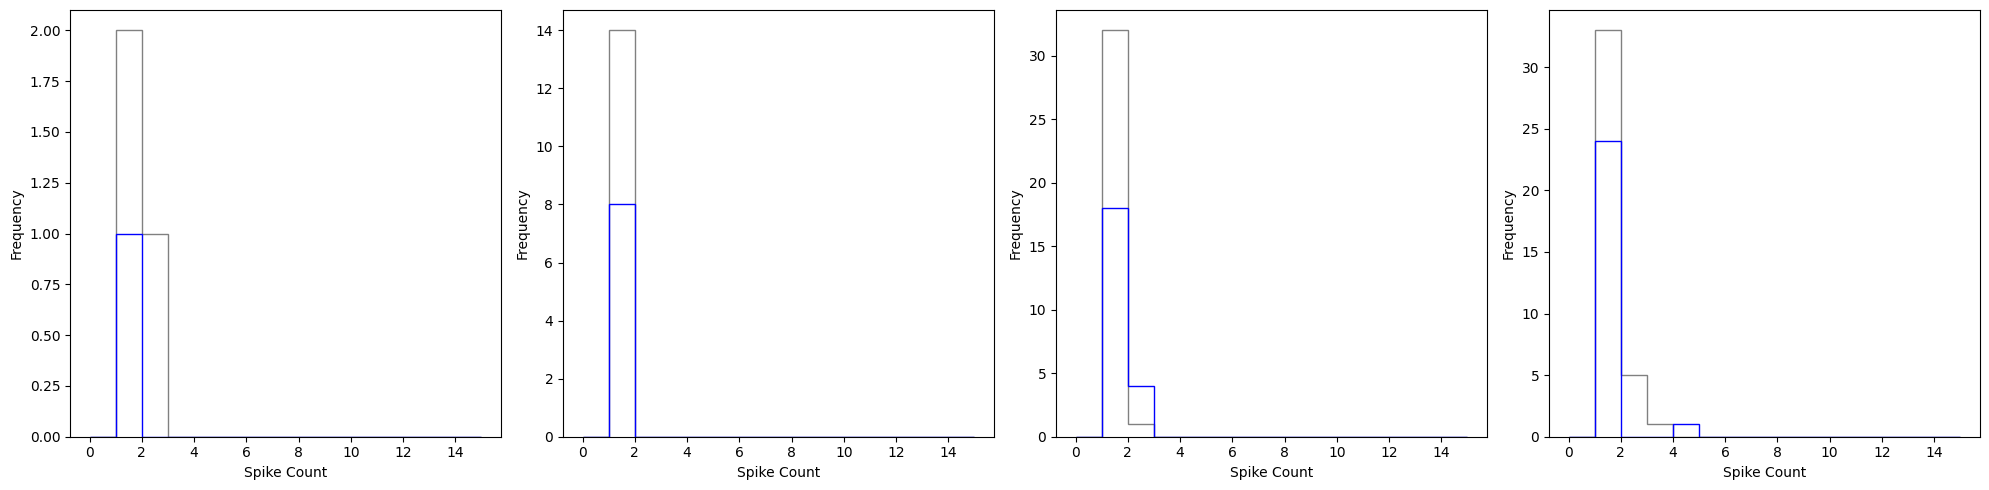

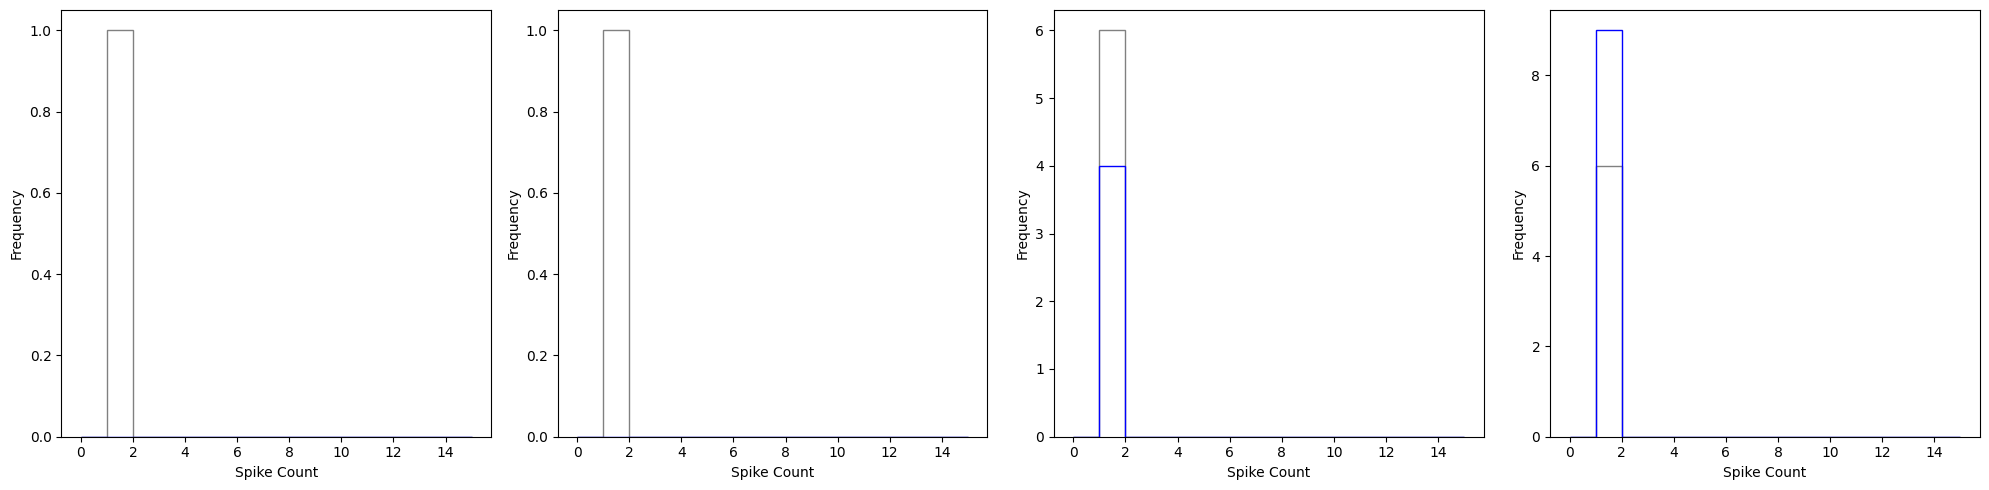

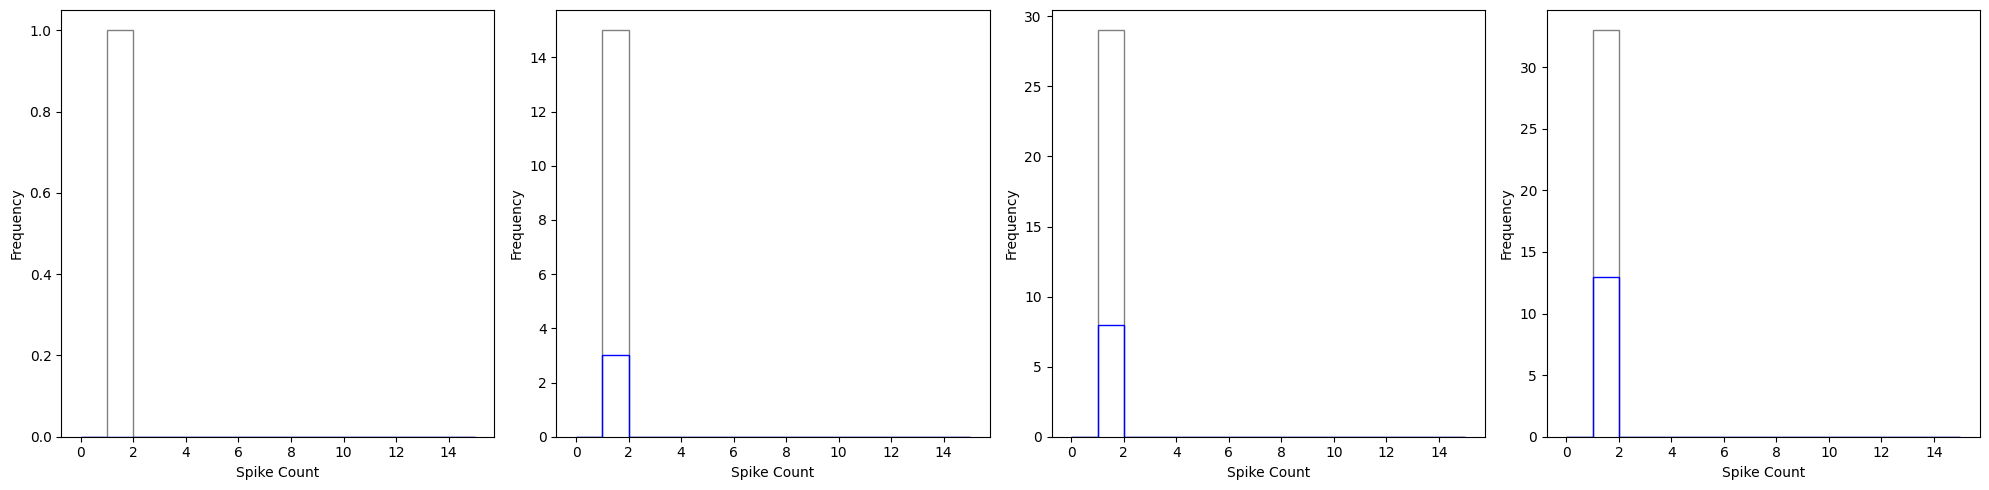

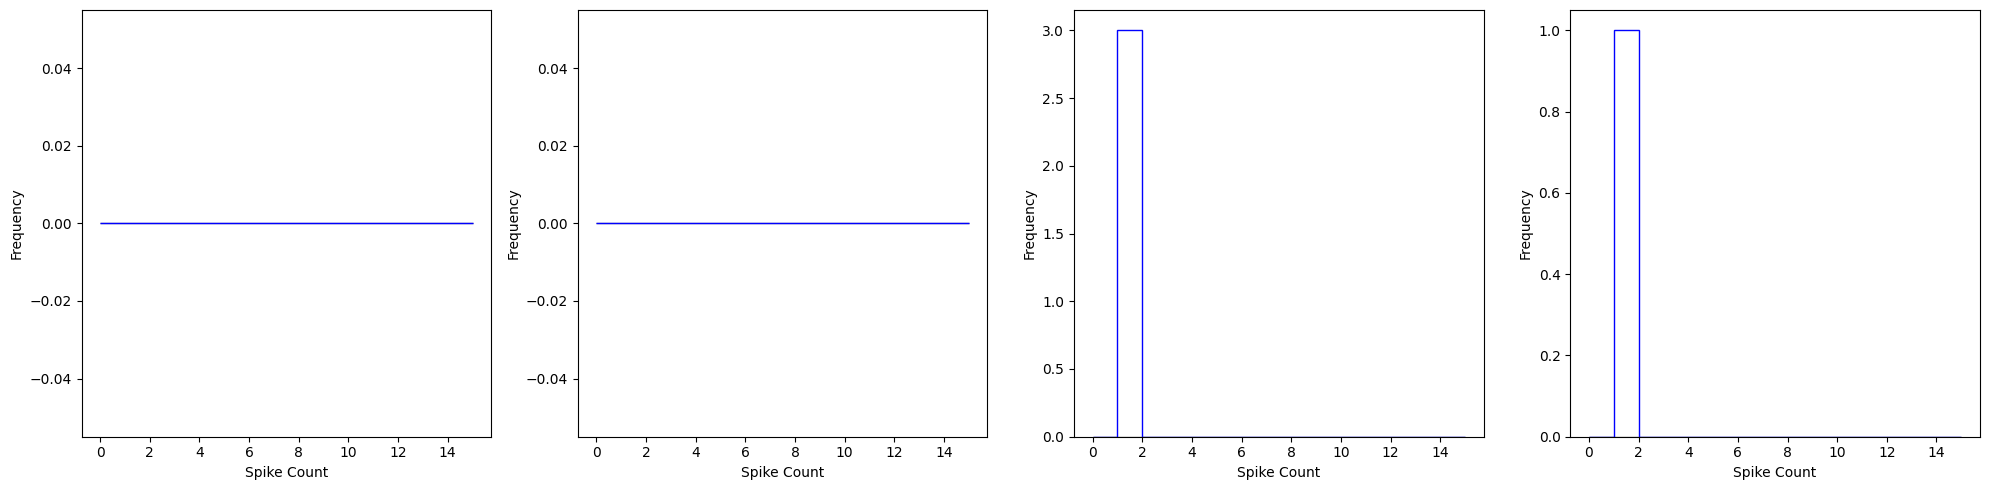

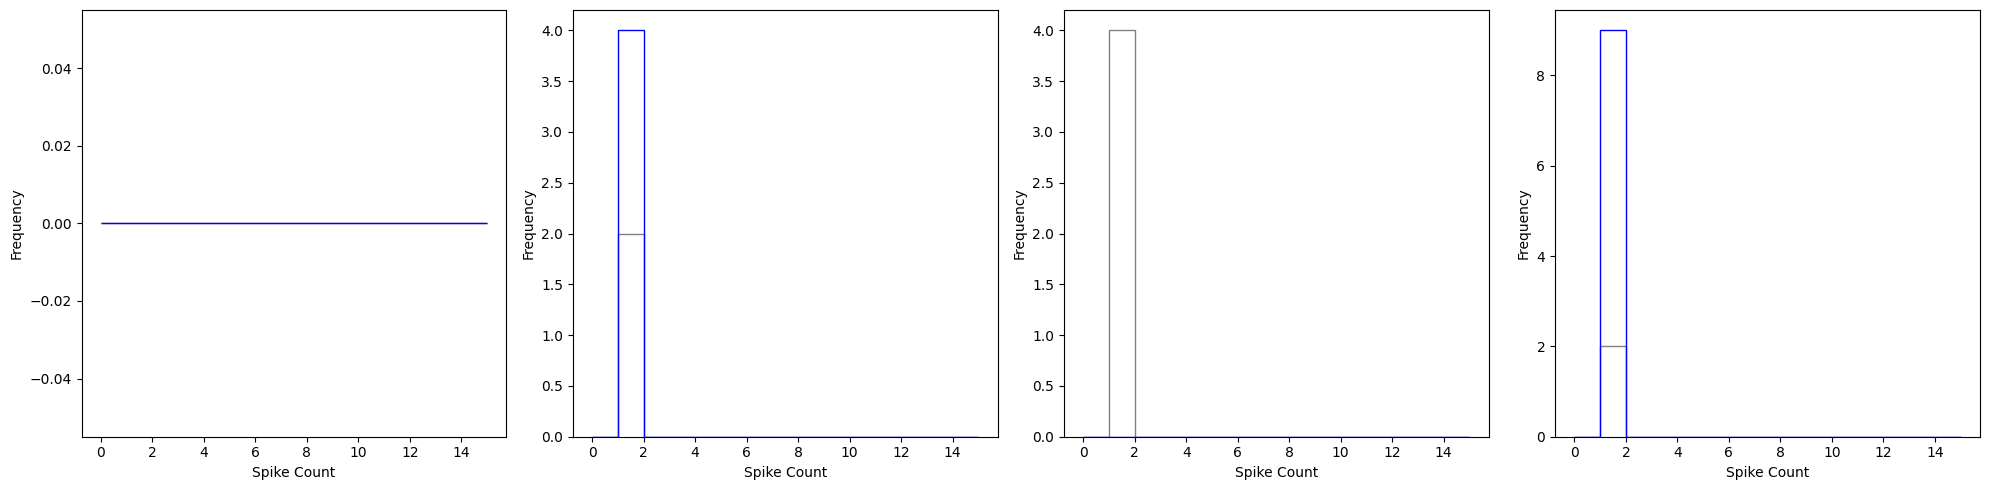

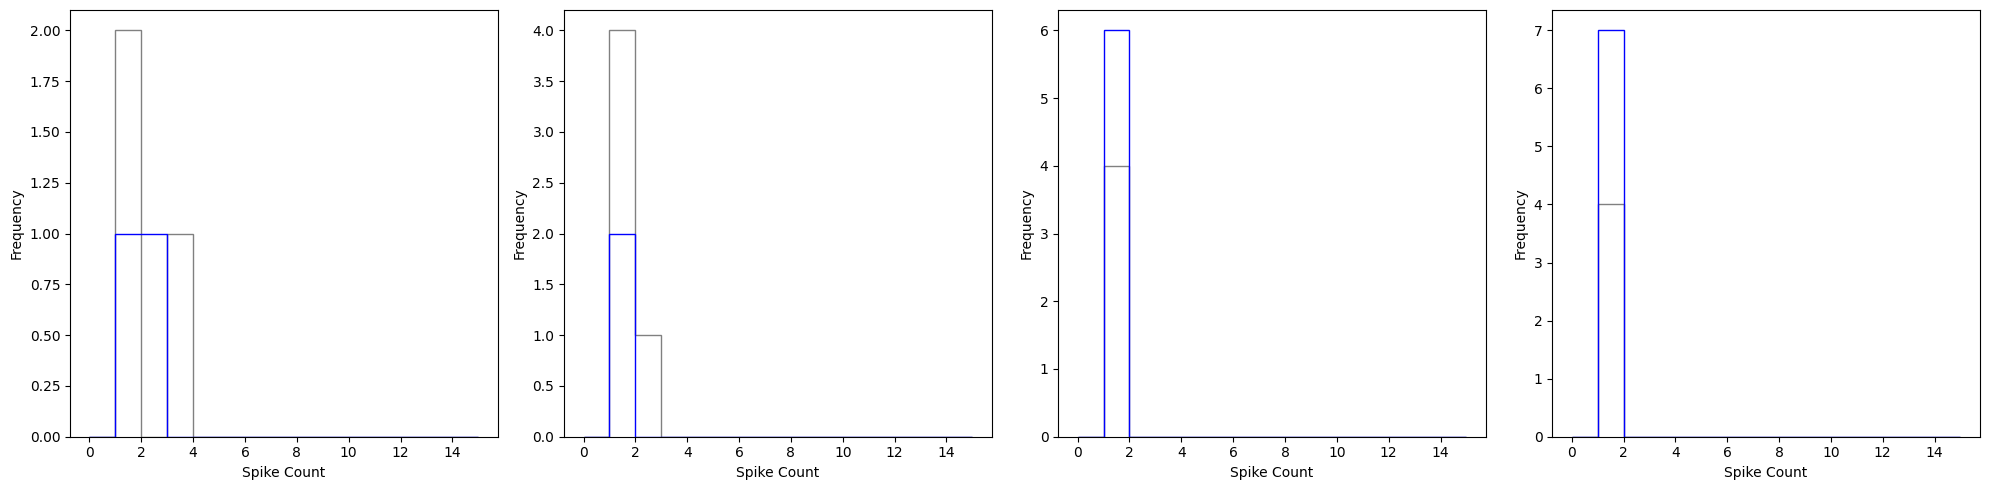

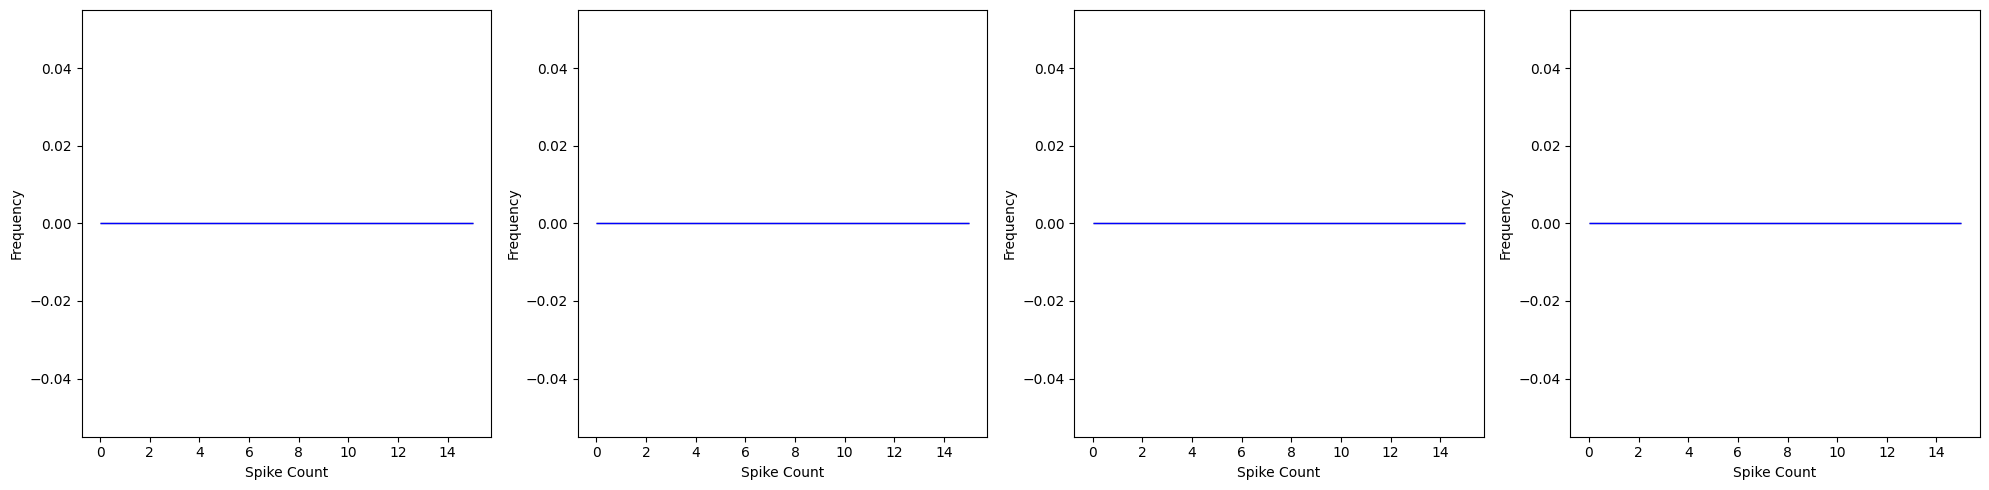

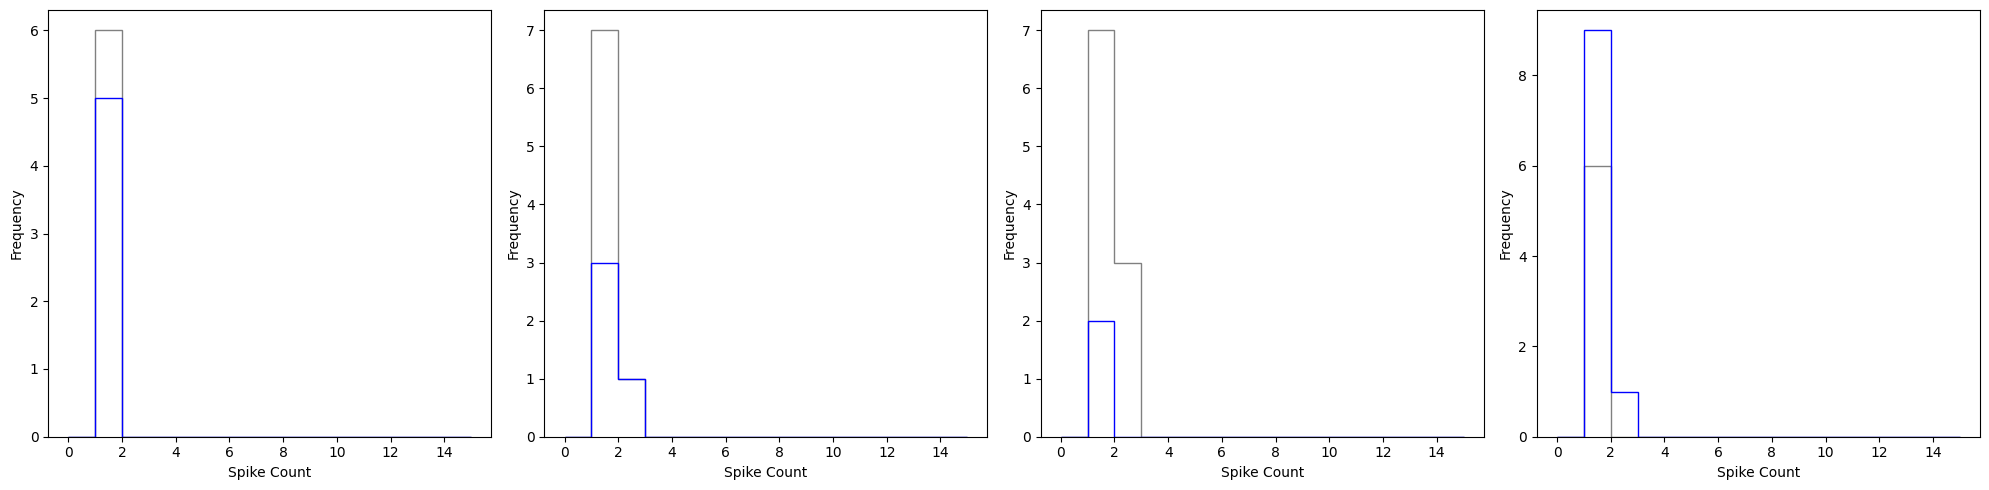

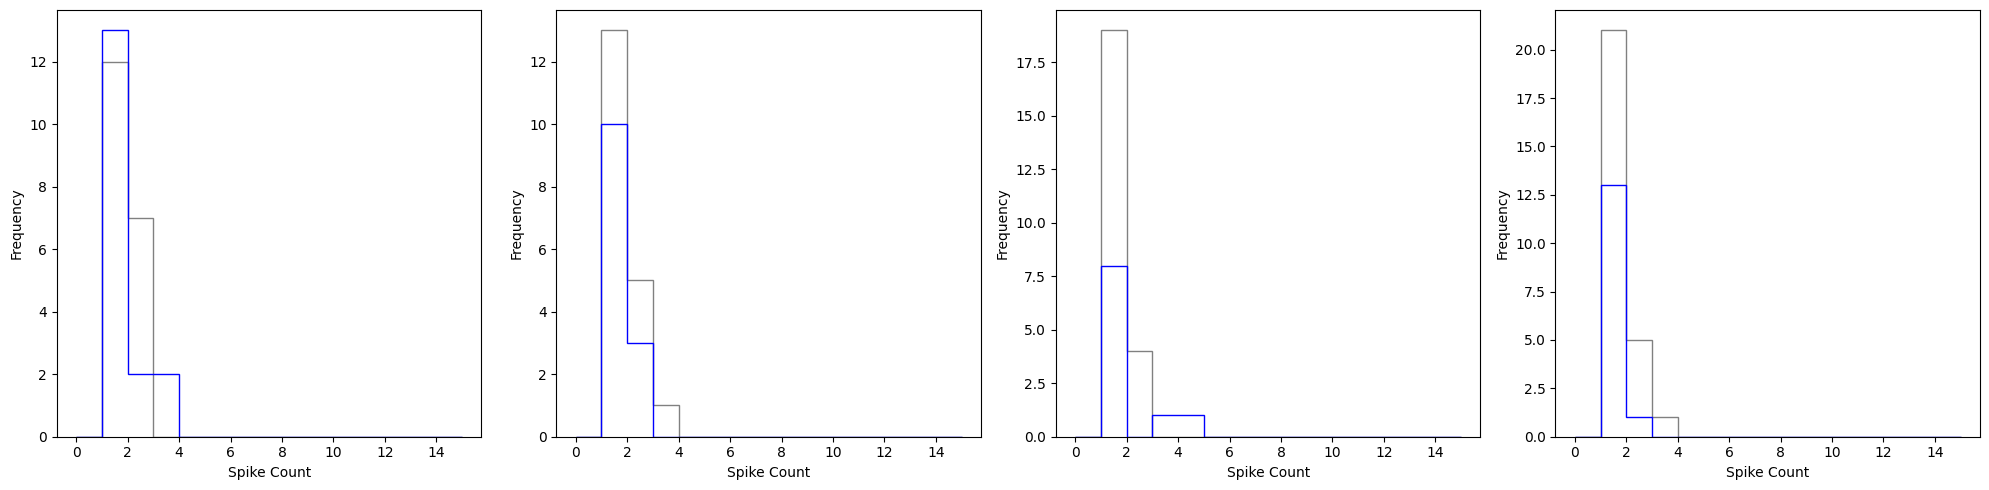

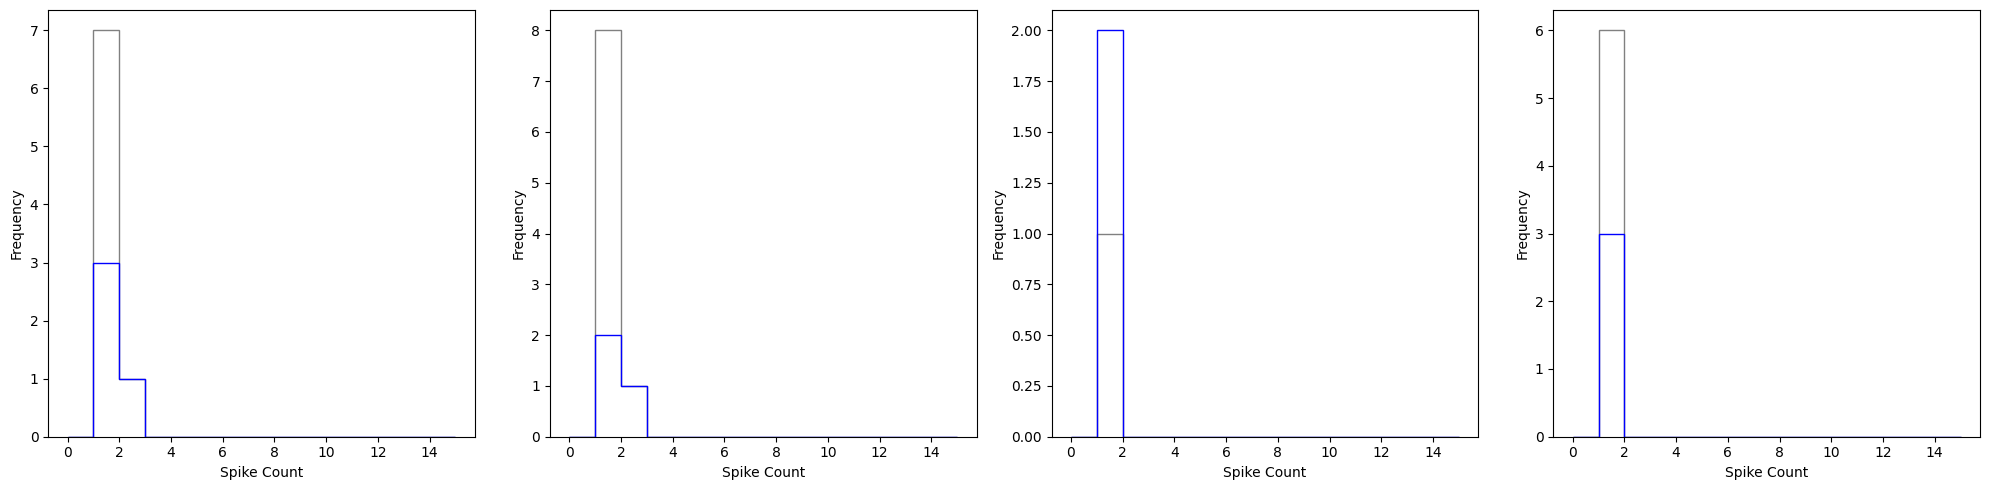

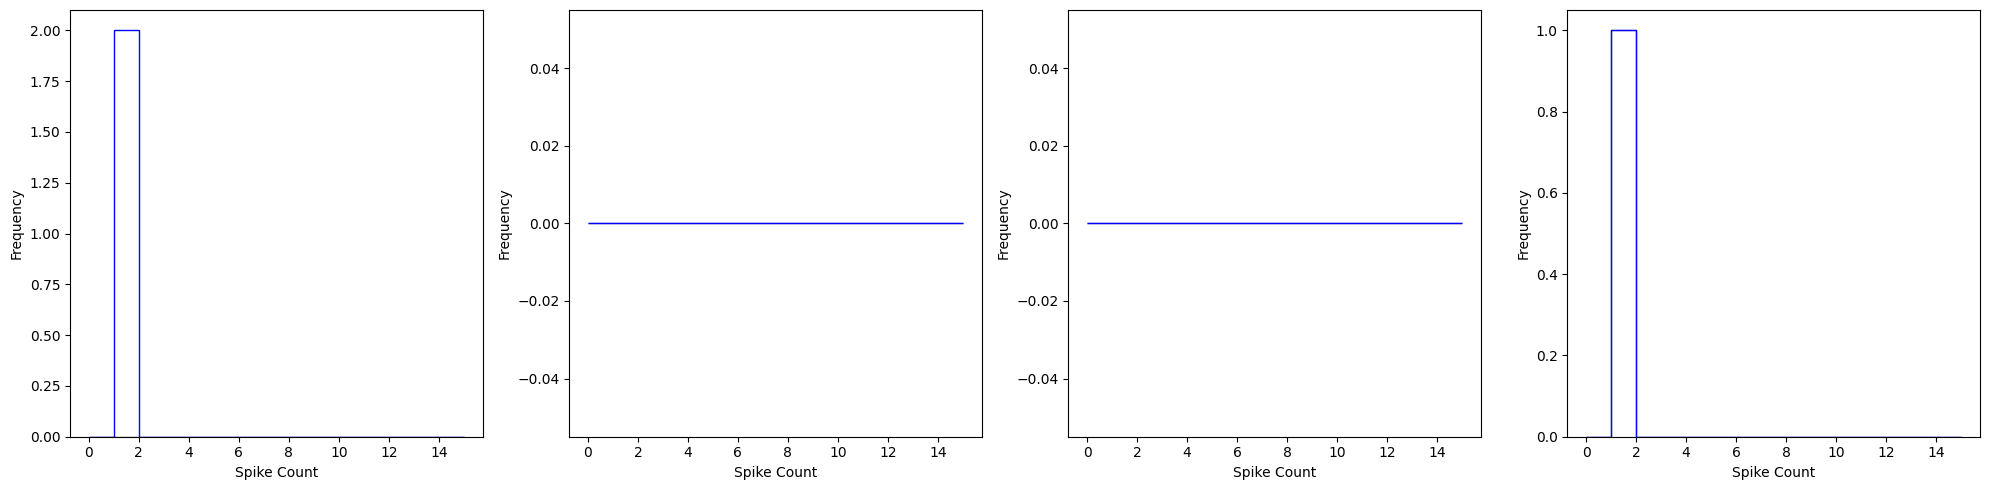

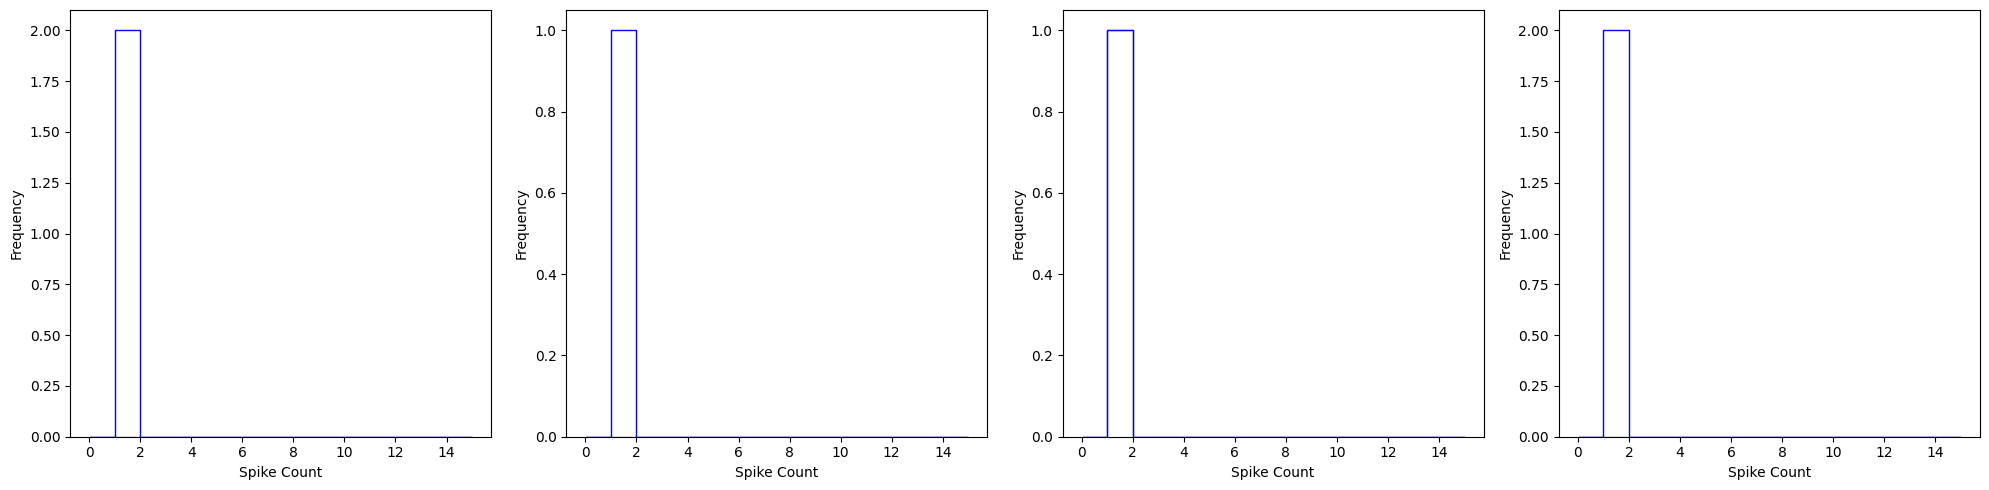

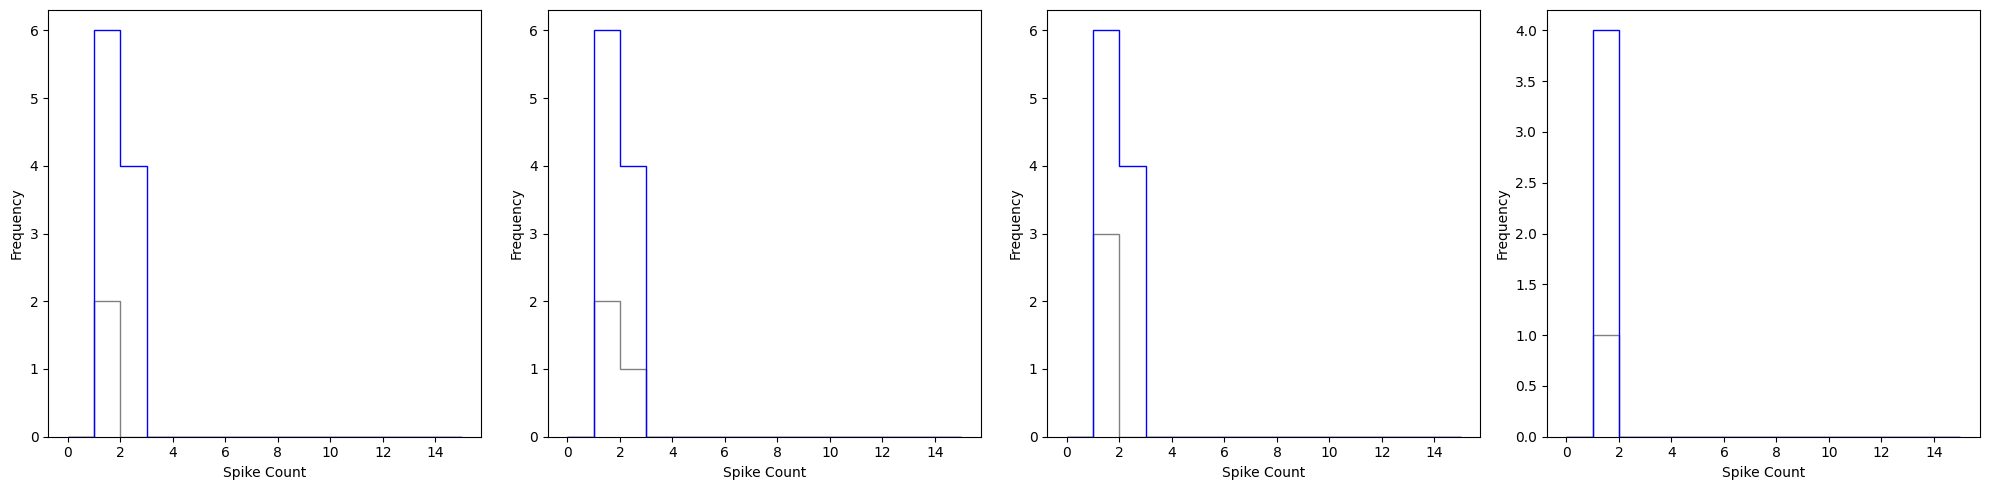

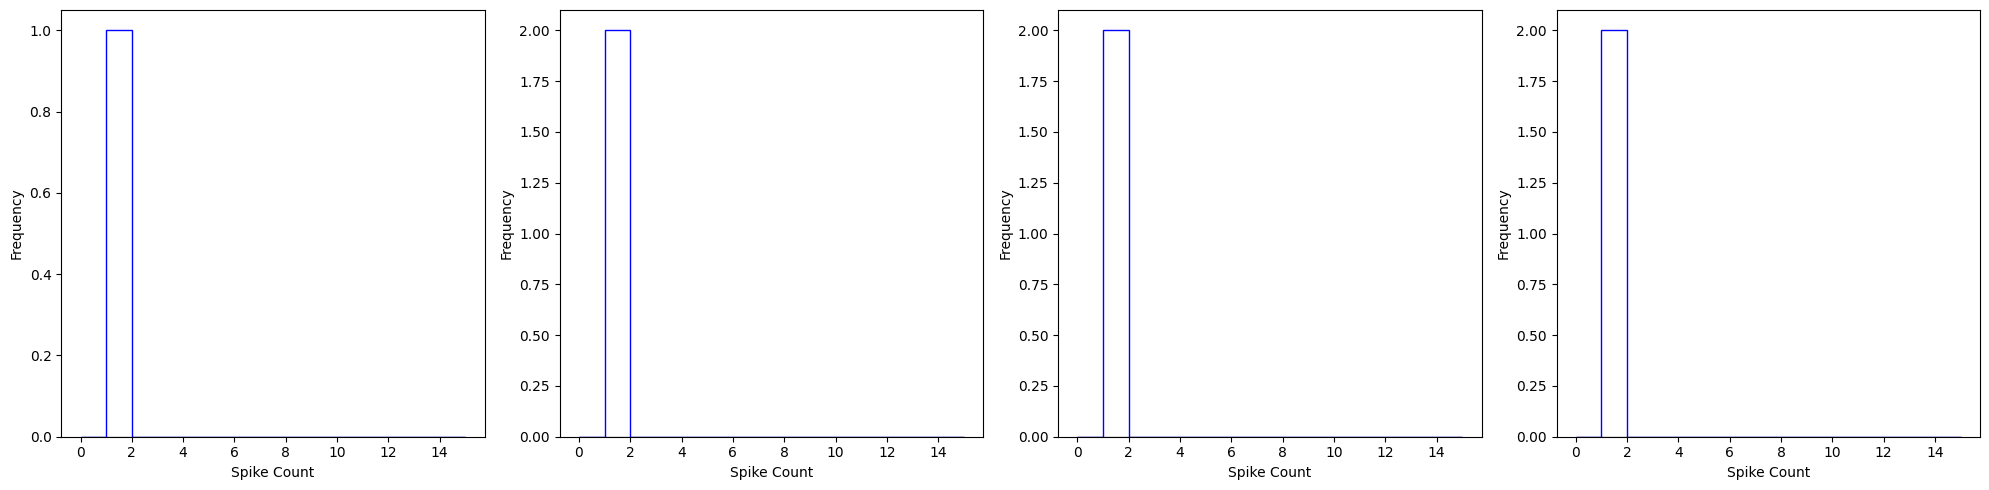

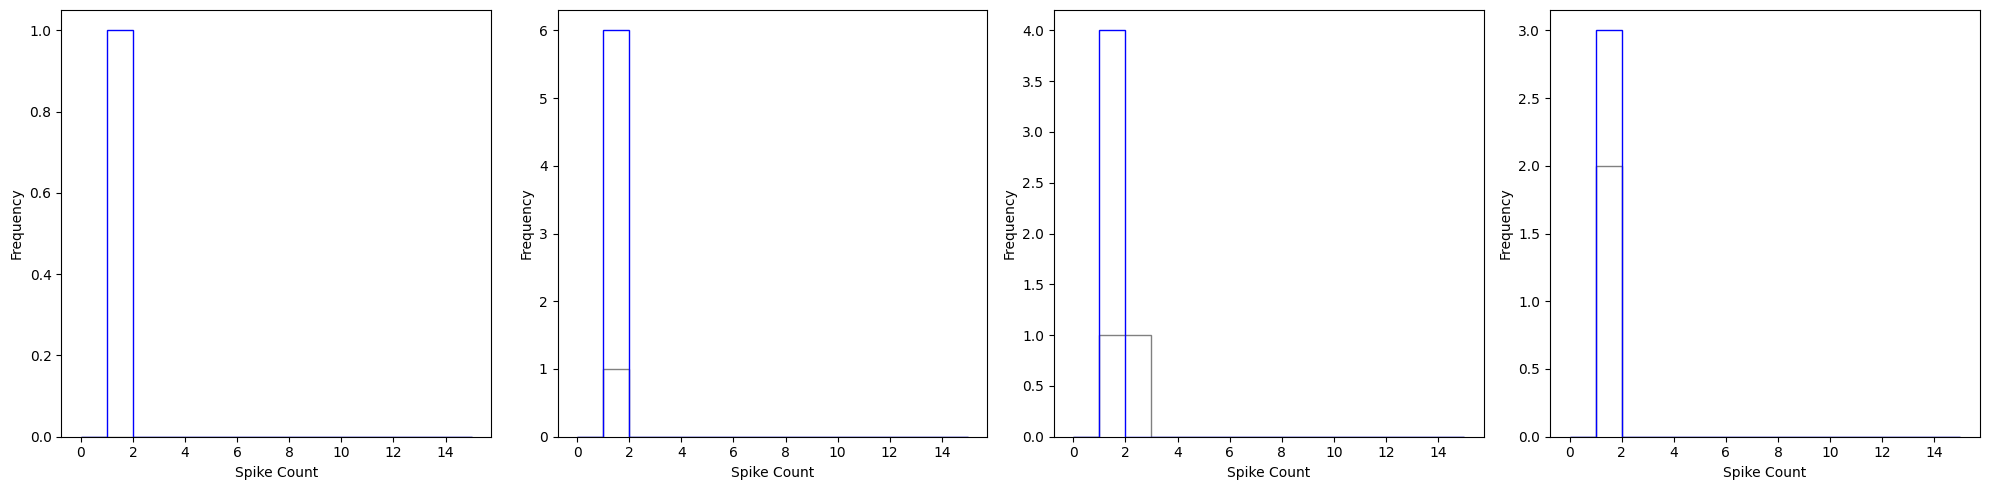

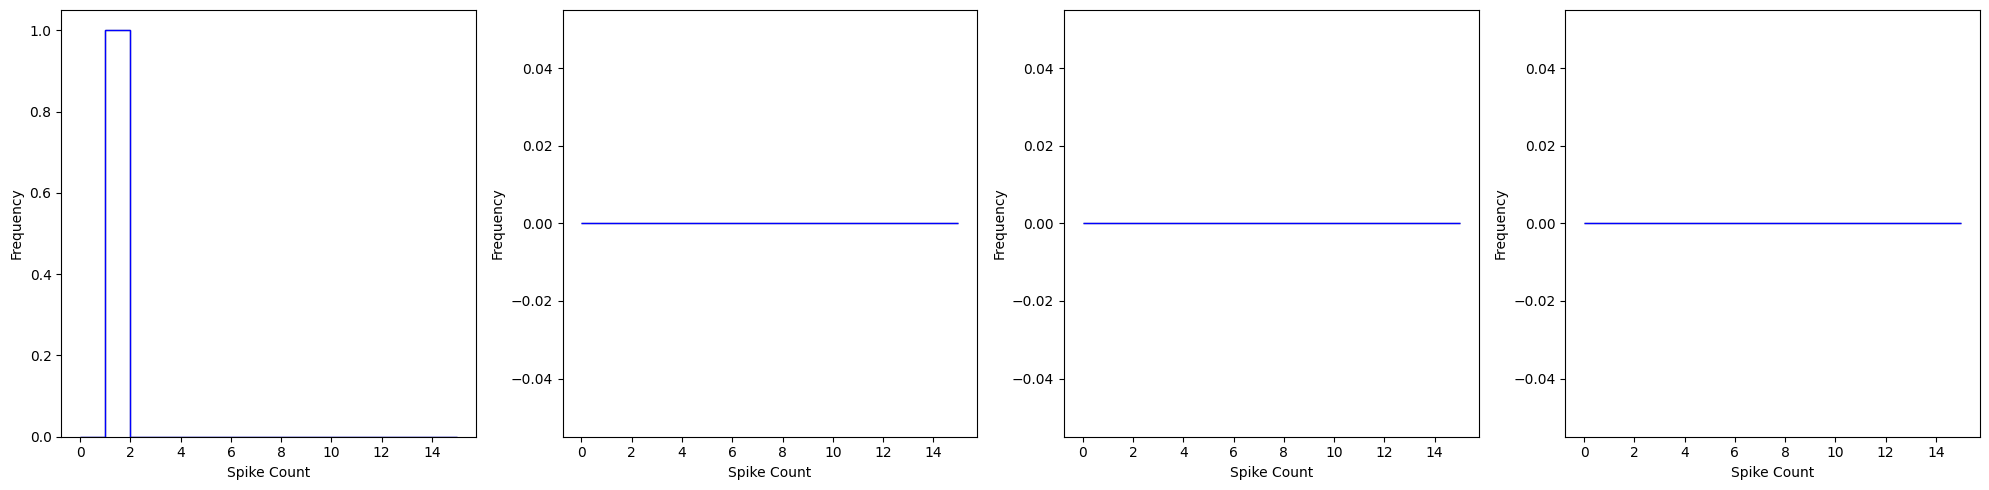

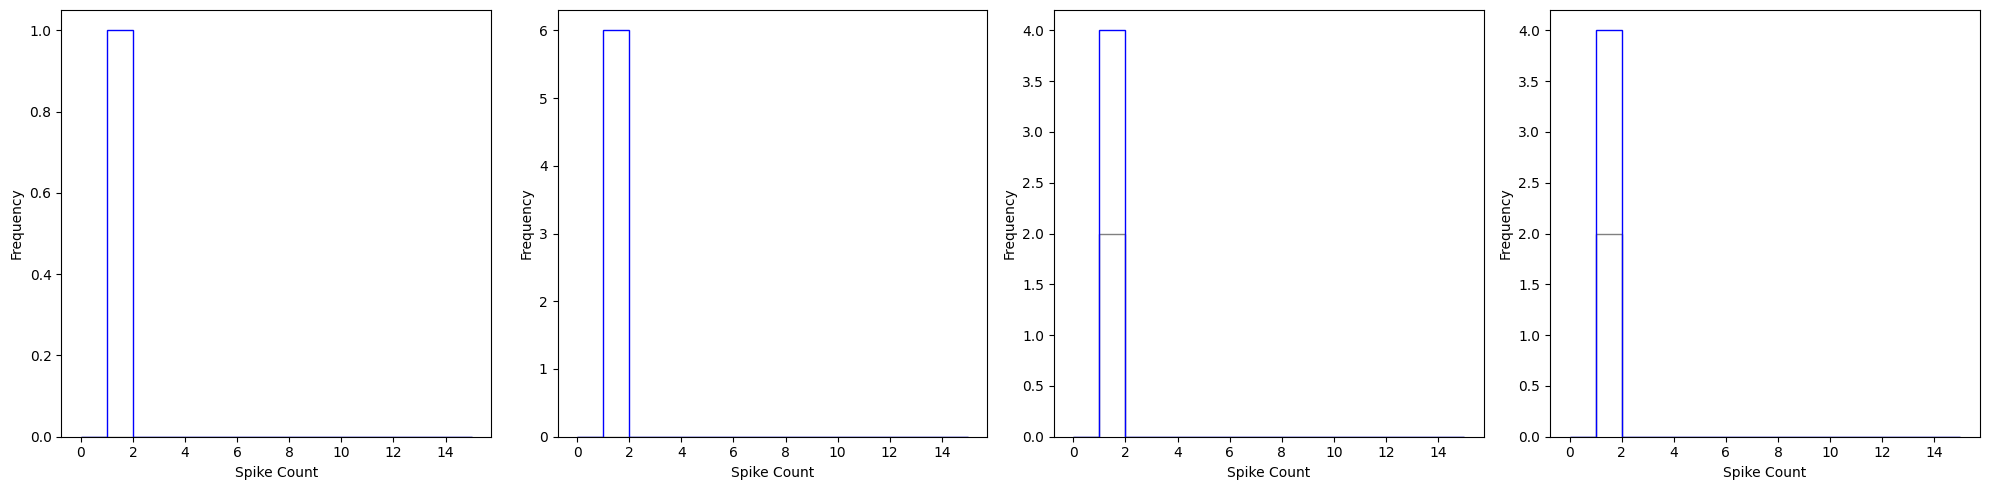

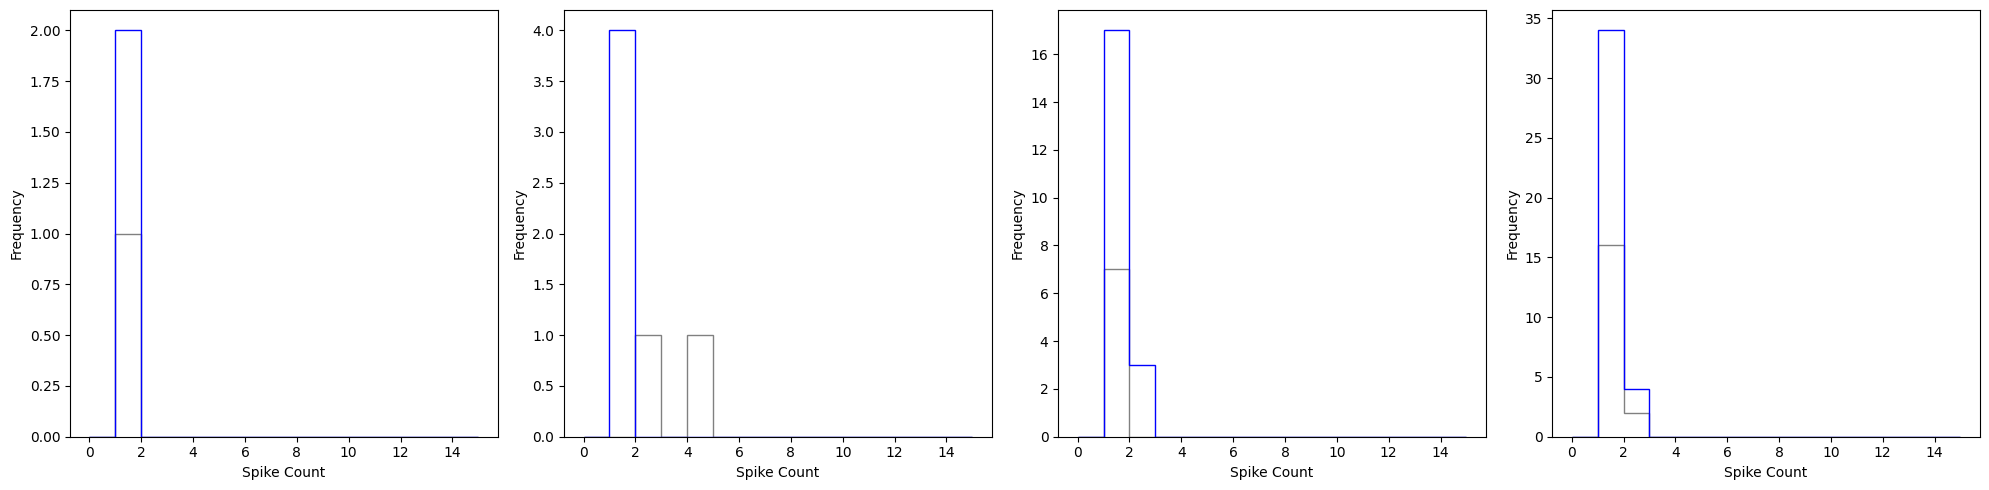

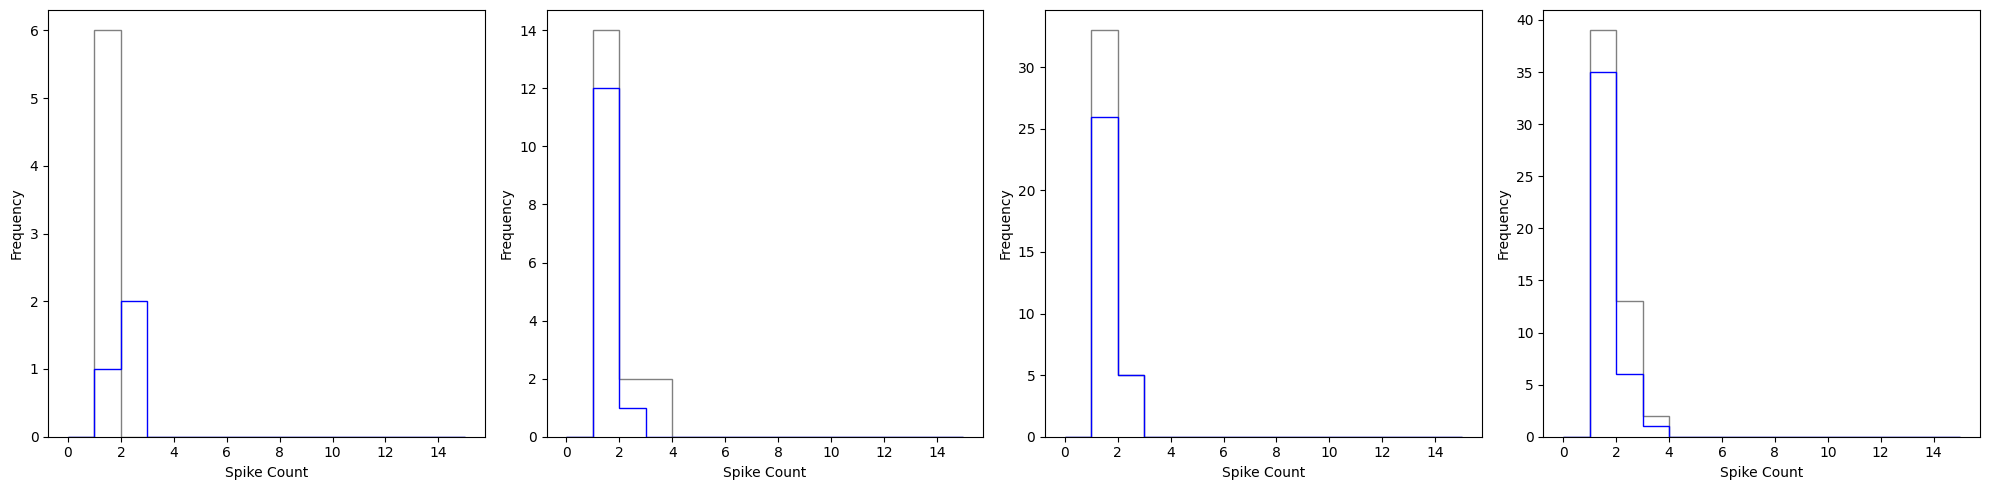

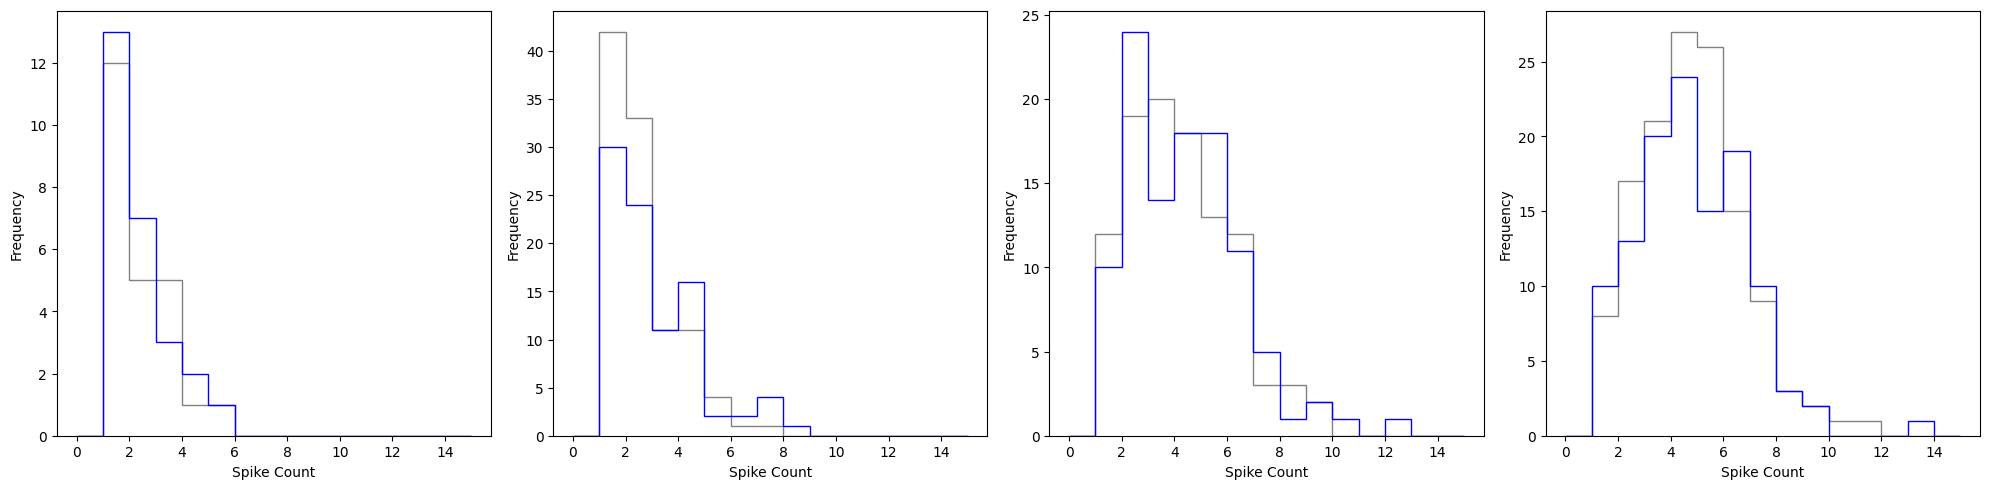

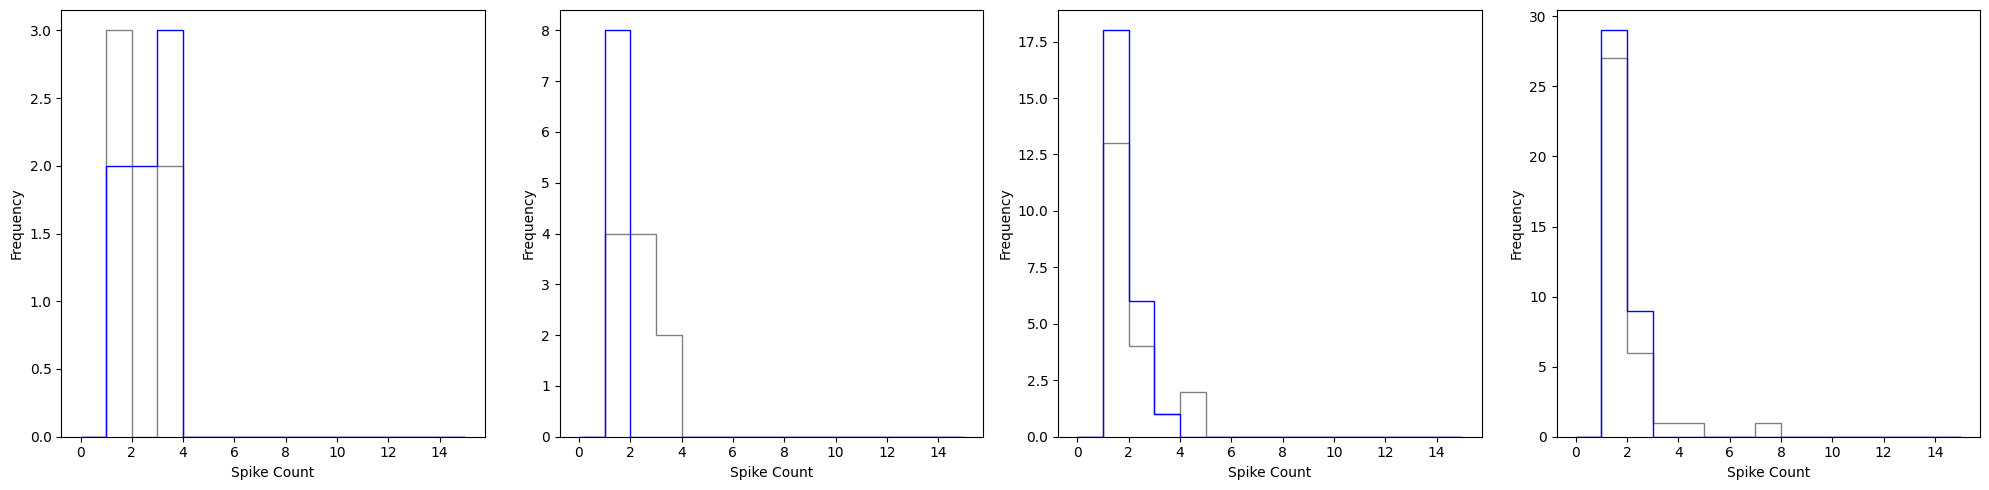

In [64]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_spike_histograms_per_stim_and_epoch(spike_data, bin_edges, exclude_zero_spikes=False):
    """
    Plots histograms of spike counts for different stimulus types and epochs.

    Parameters:
    spike_data (dict): The output from the `extract_conditioned_spike_data` function, a nested dictionary with spike counts and firing rates for each condition.
    bin_edges (list or array-like): The bin edges to use for the histograms.
    exclude_zero_spikes (bool): Whether to exclude trials with zero spikes from the histograms. Default is False.

    """
    # Define stimulus types and epochs
    stimulus_types = ['Zero', 'Low', 'Mid', 'Max']
    epochs = ['_Pre', '_Post']
    
    # Define colors for each epoch for visualization
    epoch_colors = {'_Pre': 'grey', '_Post': 'blue'}
    
    # Loop through each unit_id in the spike_data
    for unit_id, conditions_data in spike_data.items():
        
        # Create 1x4 subplots
        fig, axes = plt.subplots(1, 4, figsize=(20, 5))
        
        # Loop through each stimulus type and plot the data for both Pre and Post epochs
        for i, stimulus_type in enumerate(stimulus_types):
            
            # Get the current axis
            ax = axes[i]
            
            # Plot histograms for both Pre and Post epochs
            for epoch in epochs:
                condition = stimulus_type + epoch
                
                # Get the spike counts for all trials in the current condition
                spike_counts = [x[1] for x in conditions_data.get(condition, [])]
                
                # Optionally exclude trials with zero spikes
                if exclude_zero_spikes:
                    spike_counts = [count for count in spike_counts if count > 0]
                
                # Plot the histogram with specified bin edges
                ax.hist(spike_counts, bins=bin_edges, edgecolor=epoch_colors[epoch], histtype='step')
        
        # Add labels
        for ax in axes:
            ax.set_xlabel('Spike Count')
            ax.set_ylabel('Frequency')
        
        # Adjust layout to prevent overlapping
        plt.tight_layout()
        
        # Show the plot
        plt.show()



plot_spike_histograms_per_stim_and_epoch(extracted_spiked_for_earlyphase_cond, bin_edges=list(range(0, 16)), exclude_zero_spikes=True)

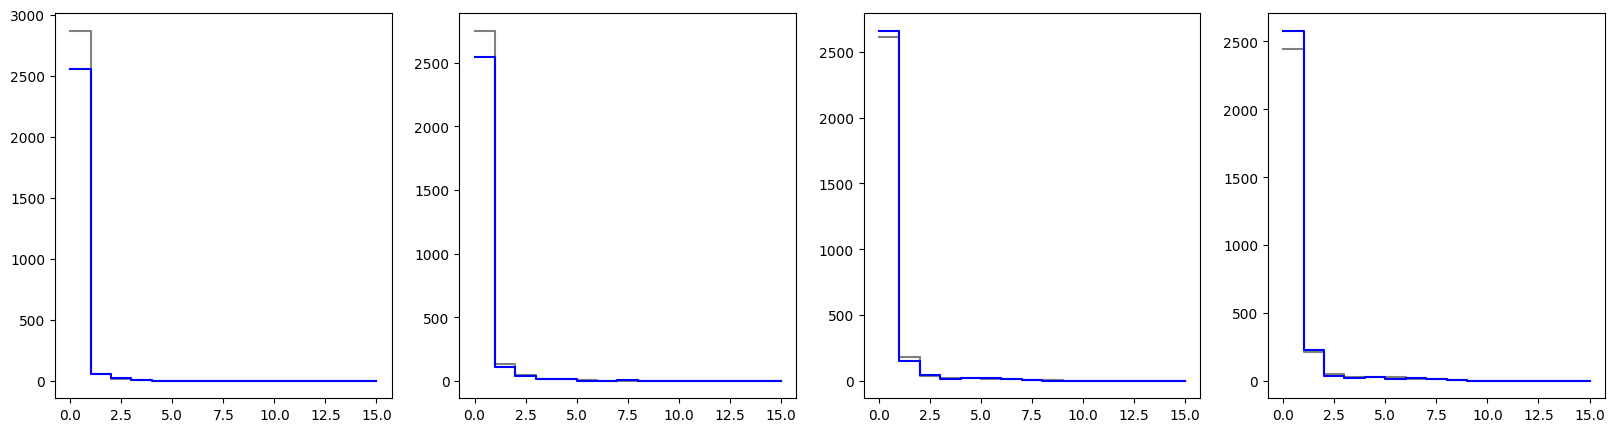

In [86]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

def plot_spike_histograms(spike_data, exclude_zero_spikes=False, pool_units=False):
    """
    Plots histograms of spike counts for different stimulus types and epochs.

    Parameters:
    spike_data (dict): Nested dictionary with spike counts and firing rates for each condition.
    exclude_zero_spikes (bool): Whether to exclude trials with zero spikes. Default is False.
    pool_units (bool): Whether to pool all unit IDs onto the same set of subplots. Default is False.

    """
    # Define stimulus types and epochs
    stimulus_types = ['Zero', 'Low', 'Mid', 'Max']
    epochs = ['_Pre', '_Post']
    
    # Define colors for each epoch for visualization
    epoch_colors = {'_Pre': 'grey', '_Post': 'blue'}
    
    # Define bin edges to represent exact integer spike counts from 0 to 15
    bin_edges = list(range(0, 17))
    
    if pool_units:
        # Create a dictionary to store pooled spike counts
        pooled_spike_counts = {stimulus_type + epoch: [] for stimulus_type in stimulus_types for epoch in epochs}

        # Loop through each unit_id in the spike_data to pool the data
        for unit_id, conditions_data in spike_data.items():
            for stimulus_type in stimulus_types:
                for epoch in epochs:
                    condition = stimulus_type + epoch
                    
                    # Get the spike counts for all trials in the current condition
                    spike_counts = [x[1] for x in conditions_data.get(condition, [])]
                    
                    # Optionally exclude trials with zero spikes
                    if exclude_zero_spikes:
                        spike_counts = [count for count in spike_counts if count > 0]
                    
                    # Add the spike counts to the pooled data
                    pooled_spike_counts[condition].extend(spike_counts)

        # Create 1x4 subplots for the pooled data
        fig, axes = plt.subplots(1, 4, figsize=(20, 5))
        
        # Plot the pooled data
        for i, stimulus_type in enumerate(stimulus_types):
            for epoch in epochs:
                condition = stimulus_type + epoch
                
                # Get the spike counts for the current condition
                spike_counts = pooled_spike_counts[condition]
    
                # Get the histogram values using np.histogram
                hist_values, _ = np.histogram(spike_counts, bins=bin_edges)
                
                # Plot the histogram using plt.step
                axes[i].step(bin_edges[:-1], hist_values, where='post', color=epoch_colors[epoch])

    else:
        # Loop through each unit_id in the spike_data to plot individually
        for unit_id, conditions_data in spike_data.items():
            
            # Create 1x4 subplots for individual units
            fig, axes = plt.subplots(1, 4, figsize=(20, 5))
            
            # Plot the data for individual units
            for i, stimulus_type in enumerate(stimulus_types):
                for epoch in epochs:
                    condition = stimulus_type + epoch
                    
                    # Get the spike counts for all trials in the current condition
                    spike_counts = [x[1] for x in conditions_data.get(condition, [])]
                    
                    # Optionally exclude trials with zero spikes
                    if exclude_zero_spikes:
                        spike_counts = [count for count in spike_counts if count > 0]

                    # Get the histogram values using np.histogram
                    hist_values, _ = np.histogram(spike_counts, bins=bin_edges)
                    
                    # Plot the histogram using plt.step
                    axes[i].step(bin_edges[:-1], hist_values, where='post', color=epoch_colors[epoch])
            
            # Adjust layout to prevent overlapping
            plt.tight_layout()

            # Show the plot for the current unit
            plt.show()
            
            # Close the figure to free up memory
            plt.close(fig)




plot_spike_histograms(extracted_spiked_for_earlyphase_cond, exclude_zero_spikes=False, pool_units=True)


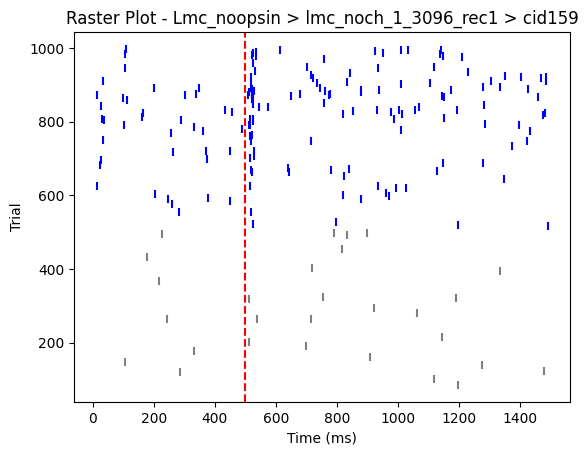

In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt

def plot_raster(EED, xarrays, unit_id):
    """
    Plots a raster plot for a single unit, with the color of the spike events indicating the epoch they occurred in (Pre or Post).
    
    Parameters:
    - EED (object): The EED instance containing the experiment data.
    - xarrays (dict): Dictionary containing xarray DataArrays with neural data.
    - unit_id (str): The ID of the unit to plot.

    Returns:
    - None
    """
    # Get the unit metadata
    unit_metadata = EED.unit_id_map[unit_id]
    
    # Get the data for the specified unit
    data = xarrays[unit_id]

    # Get trial epochs and create a color map to differentiate spikes based on epoch
    trial_epochs = EED.trial_intensity_dataframes[unit_id]['Epoch']
    epoch_colors = {'Pre': 'grey', 'Post': 'blue'}
    
    # Create the raster plot
    plt.figure()
    plt.title(f"Raster Plot - {' > '.join(unit_metadata['path'])}")
    
    time_values = data.coords['Time'].values
    
    for trial_id, trial_data in data.groupby('Trial_ID'):
        spike_times = time_values[trial_data.values[0, :].astype(bool)]
        
        # Get the index of the trial ID to use in the color map
        trial_idx = data.Trial_ID.to_index().get_loc(trial_id)
        
        # Get the epoch of the trial to determine the color of the spikes
        trial_epoch = trial_epochs.iloc[trial_idx]
        trial_color = epoch_colors[trial_epoch]
        
        plt.scatter(spike_times, [trial_idx]*len(spike_times), c=trial_color, marker='|')
    
    plt.xlabel('Time (ms)')
    plt.ylabel('Trial')
    plt.axvline(x=500, color='red', linestyle='--')  # Stimulus onset
    plt.show()


# Plot the raster plot for a single unit
plot_raster(EED, xarrys_ms, '9fc0d2767bd8cd4ae04ad00b6347491b44e8e9553968a155f383c9ee43aee73a')

In [56]:
def categorize_trials_by_conditions(EED, xarrays, separate_by_epoch=True):
    """
    Categorizes trials by different conditions (intensity and optionally epoch) and prepares data for further analyses or plotting.

    Parameters:
    - EED (object): The EED instance containing the experiment data.
    - xarrays (dict): Dictionary containing xarray DataArrays with neural data.
    - separate_by_epoch (bool): Whether to separate the data by epoch in addition to intensity.

    Returns:
    - dict: A nested dictionary with outer keys being unit IDs and inner keys representing different conditions 
            (combinations of intensity and optionally epoch), and values being xarray DataArrays containing the data for those conditions.
    """
    # Mapping of intensity values to their respective labels
    intensity_mapping = {1: 'Zero', 2: 'Low', 3: 'Mid', 4: 'Max'}

    # Create a dictionary to store data categorized by condition
    data_by_condition = {}

    # Iterating through all combinations of epochs and intensities
    for unit_id, xarray in xarrays.items():
        data_by_condition[unit_id] = {}
        for epoch in (['Pre', 'Post'] if separate_by_epoch else [None]):
            for intensity_value, intensity_label in intensity_mapping.items():
                # Create a unique key for this condition
                condition_key = f"{intensity_label}_{epoch}" if epoch else intensity_label
                
                # Use the query_units method to get the data for this condition
                condition_data = EED.query_units(xarrays, [unit_id], intensity=intensity_label, epoch=epoch)[unit_id]
                
                # Store this data in the dictionary
                data_by_condition[unit_id][condition_key] = condition_data

    return data_by_condition



unit_id = ['c8f5e0605522dfc696ff79b9782300ad3a90175ad0f6e910274d968d39c082e4', '69d625b1ee3dd0d024ae59d92baeb60d2eee6295663dbc4d80b58e344681825a']
output_test = categorize_trials_by_conditions(EED, xarrys_ms, separate_by_epoch=True)


In [57]:
output_test

{'9fc0d2767bd8cd4ae04ad00b6347491b44e8e9553968a155f383c9ee43aee73a': {'Zero_Pre': <xarray.DataArray (Trial_ID: 139, Time: 1500)>
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]])
  Coordinates:
    * Trial_ID  (Trial_ID) object 'Trial_3' 'Trial_4' ... 'Trial_496' 'Trial_501'
    * Time      (Time) float64 0.0 1.001 2.001 ... 1.498e+03 1.499e+03 1.5e+03
  Attributes:
      Intensity:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,
  'Low_Pre': <xarray.DataArray (Trial_ID: 122, Time: 1500)>
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]])
  Coordinates:
    * Trial_ID  (Trial_ID) object 'Trial_1' 'Trial_2' ... 'Trial_505' 'Trial_507'
  

In [5]:
output_test

{'9fc0d2767bd8cd4ae04ad00b6347491b44e8e9553968a155f383c9ee43aee73a': {'Zero_Pre': <xarray.DataArray (Trial_ID: 139, Time: 1500)>
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]])
  Coordinates:
    * Trial_ID  (Trial_ID) object 'Trial_3' 'Trial_4' ... 'Trial_496' 'Trial_501'
    * Time      (Time) float64 0.0 1.001 2.001 ... 1.498e+03 1.499e+03 1.5e+03
  Attributes:
      Intensity:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,
  'Low_Pre': <xarray.DataArray (Trial_ID: 122, Time: 1500)>
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]])
  Coordinates:
    * Trial_ID  (Trial_ID) object 'Trial_1' 'Trial_2' ... 'Trial_505' 'Trial_507'
  

In [22]:
# Example usage to get data for a specific unit with 'Mid' intensity during the 'Pre' epoch
queried_data = EED.query_units(xarrys_ms, ['9fc0d2767bd8cd4ae04ad00b6347491b44e8e9553968a155f383c9ee43aee73a'], intensity=None, epoch=None)
queried_data['9fc0d2767bd8cd4ae04ad00b6347491b44e8e9553968a155f383c9ee43aee73a']
xr_data = queried_data['9fc0d2767bd8cd4ae04ad00b6347491b44e8e9553968a155f383c9ee43aee73a']

In [35]:
# Assign a temporary name to the DataArray (replace 'temp_name' with an appropriate name)
xr_data.name = 'temp_name'

# Print basic information about the xarray
print("Xarray Information:")
print(xr_data)

# Print the dimensions of the xarray
print("\nDimensions:")
print(xr_data.dims)

# Print coordinate information
print("\nCoordinates:")
print(xr_data.coords)

# Print attributes of the xarray
print("\nAttributes:")
print(xr_data.attrs)

# Print a summary of the xarray's data
print("\nData Summary:")
print(xr_data.to_dataframe().describe())



Xarray Information:
<xarray.DataArray 'temp_name' (Trial_ID: 999, Time: 1500)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Trial_ID  (Trial_ID) object 'Trial_1' 'Trial_2' ... 'Trial_998' 'Trial_999'
  * Time      (Time) float64 0.0 1.001 2.001 ... 1.498e+03 1.499e+03 1.5e+03
Attributes:
    Intensity:  [2 2 1 1 2 2 2 4 2 1 2 1 1 4 3 4 1 1 1 1 1 3 1 3 1 2 4 2 1 1 ...

Dimensions:
('Trial_ID', 'Time')

Coordinates:
Coordinates:
  * Trial_ID  (Trial_ID) object 'Trial_1' 'Trial_2' ... 'Trial_998' 'Trial_999'
  * Time      (Time) float64 0.0 1.001 2.001 ... 1.498e+03 1.499e+03 1.5e+03

Attributes:
{'Intensity': array([2, 2, 1, 1, 2, 2, 2, 4, 2, 1, 2, 1, 1, 4, 3, 4, 1, 1, 1, 1, 1, 3,
       1, 3, 1, 2, 4, 2, 1, 1, 2, 1, 4, 3, 4, 4, 4, 1, 3, 3, 2, 2, 3, 4,
       1, 3, 4, 4, 3, 1, 4, 1, 1, 2, 2, 3, 4, 3, 3, 1, 3, 3, 1

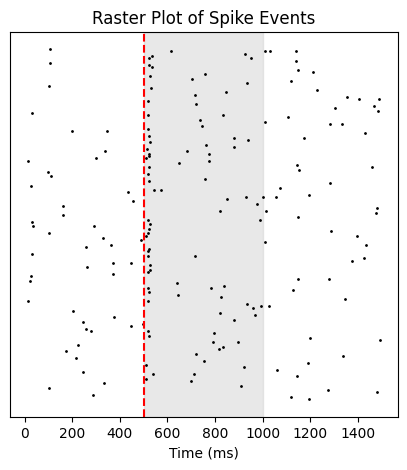

In [24]:
# Assuming your spike data is in the 'xr_data' variable

# Create a figure and axis for the raster plot
fig, ax = plt.subplots(figsize=(5, 5))

# Get the trial IDs, intensity, and epoch information from the DataFrame
df = EED.trial_intensity_dataframes['9fc0d2767bd8cd4ae04ad00b6347491b44e8e9553968a155f383c9ee43aee73a']

# Get the 'Trial_ID' values from xr_data and store them in a list
trial_ids_xarray = xr_data['Trial_ID'].values.tolist()

# Iterate through the DataFrame rows
for index, row in df.iterrows():
    # Use the index to access the corresponding 'Trial_ID' from the list
    trial_id = trial_ids_xarray[index]
    # Access the spike data using the Trial_ID
    spikes = xr_data.sel(Trial_ID=trial_id)
    spike_times = spikes.where(spikes > 0).dropna(dim='Time').Time.values
    # Plot spikes at their corresponding times
    ax.plot(spike_times, [trial_id] * len(spike_times), 'k.', markersize=2)

# Set axis labels and title
ax.set_xlabel('Time (ms)')
ax.set_title('Raster Plot of Spike Events')

# Remove y-axis labels
ax.set_yticks([])

# Add a red vertical line at 500 ms
ax.axvline(x=500, color='red', linestyle='--')

# Add a grey shaded area from 500 ms to 1000 ms
ax.axvspan(500, 1000, color='lightgrey', alpha=0.5)

# Show the plot
plt.show()

In [31]:
len(df)

999

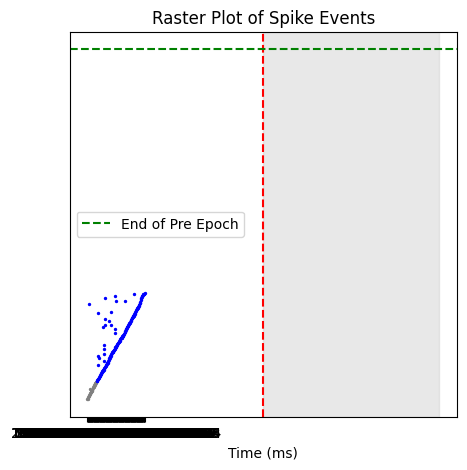

In [33]:
import numpy as np

# Create an empty matrix to store spike events and trial IDs
spike_matrix = []

# Iterate through the DataFrame rows
for index, row in df.iterrows():
    # Use the index to access the corresponding 'Trial_ID' from the list
    trial_id = trial_ids_xarray[index]

    # Access the spike data using the Trial_ID
    spikes = xr_data.sel(Trial_ID=trial_id)

    # If there are no spikes, create an empty array
    if 'Time' not in spikes.coords:
        spike_times = np.array([])
    else:
        spike_times = spikes.where(spikes > 0).dropna(dim='Time').Time.values

    # Determine the epoch for the current trial
    epoch = row['Epoch']

    # Determine the color based on the epoch
    if epoch == 'Pre':
        color = 'grey'
    elif epoch == 'Post':
        color = 'blue'
    else:
        color = 'black'  # Spike outside the specified epochs

    # Append the spike events and their trial ID to the matrix
    for spike_time in spike_times:
        spike_matrix.append([spike_time, trial_id, color])

# Convert the spike matrix to a NumPy array
spike_matrix = np.array(spike_matrix)

# Now, you have a NumPy array (spike_matrix) where each row contains spike time, trial ID, and color

# Create a figure and axis for the raster plot
fig, ax = plt.subplots(figsize=(5, 5))

# Iterate through the spike_matrix and plot spike events
for spike_data in spike_matrix:
    spike_time, trial_id, color = spike_data
    ax.scatter(spike_time, trial_id, c=color, s=2)

# Set axis labels and title
ax.set_xlabel('Time (ms)')
ax.set_title('Raster Plot of Spike Events')

# Remove y-axis labels
ax.set_yticks([])

# Add a red vertical line at 500 ms
ax.axvline(x=500, color='red', linestyle='--')

# Add a grey shaded area from 500 ms to 1000 ms
ax.axvspan(500, 1000, color='lightgrey', alpha=0.5)

# Add a horizontal line at the end of the 'Pre' epoch
last_pre_index = pre_indices[-1] if not pre_indices.empty else None
if last_pre_index is not None:
    ax.axhline(y=last_pre_index, color='green', linestyle='--', label='End of Pre Epoch')

# Show the trial labels in the legend
ax.legend()

# Show the plot
plt.show()



In [34]:
spike_matrix.shape


(187, 3)

In [19]:
unit_ids = ['c8f5e0605522dfc696ff79b9782300ad3a90175ad0f6e910274d968d39c082e4', '69d625b1ee3dd0d024ae59d92baeb60d2eee6295663dbc4d80b58e344681825a']
epochs = ['Post']
intensity_levels = ['Mid']
filtered_data = EED.query_units(x, unit_ids, 'Mid', 'Pre')
filtered_data['c8f5e0605522dfc696ff79b9782300ad3a90175ad0f6e910274d968d39c082e4']

NameError: name 'x' is not defined

In [ ]:
psth_data = EED.get_psths(['c8f5e0605522dfc696ff79b9782300ad3a90175ad0f6e910274d968d39c082e4', '69d625b1ee3dd0d024ae59d92baeb60d2eee6295663dbc4d80b58e344681825a','9a1b248f29d745b2161ce7b4a356007c485094beb24cd10533e13de7a41469ee'])
psth_data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

def plot_psth(psth_data, window=5):
    # Define the stimulation types
    stim_types = ['0', 'low', 'mid', 'high']
    
    # Create the convolution window based on the specified size
    convolution_window = np.ones(window)
    
    # Iterate through unit IDs in PSTH data
    for unit_id, unit_data in psth_data.items():
        # Check if there's any data for this unit
        if not unit_data['Pre']['PSTH_raw'].any() or not unit_data['Post']['PSTH_raw'].any():
            continue  # Skip if no data
        
        # Create a new figure for each unit
        fig, axes = plt.subplots(1, 4, figsize=(16, 4))
        
        for i, stim_type in enumerate(stim_types):
            pre_psth = unit_data['Pre']['PSTH_raw'][i]
            post_psth = unit_data['Post']['PSTH_raw'][i]
            
            # Convolve 'Pre' PSTH with the window
            pre_psth_convolved = np.convolve(pre_psth, convolution_window, 'same')
            
            # Convolve 'Post' PSTH with the window
            post_psth_convolved = np.convolve(post_psth, convolution_window, 'same')
            
            # Plot 'Post' PSTH in blue
            axes[i].plot(post_psth_convolved, color='blue', label='Post')
            
            # Plot 'Pre' PSTH in gray on top of 'Post'
            axes[i].plot(pre_psth_convolved, color='gray', label='Pre')
            
            axes[i].set_title(f'Stimulation Type: {stim_type}')
            axes[i].set_xlabel('Time Bins')
            axes[i].set_ylabel('Firing Rate')
        
        # Add legend at a fixed location
        for ax in axes:
            ax.legend()
        
        # Set a title for the entire figure using the unit ID at the bottom
        fig.suptitle(f'Unit ID: {unit_id}', fontsize=14, y=0.02)
        
        # Adjust layout for unit figure
        plt.tight_layout()
        
        # Show the plot for this unit
        plt.show()

# Example usage with your PSTH data
# Replace psth_data with your actual PSTH data
# plot_psth(psth_data)

# Example usage with your PSTH data
# Replace psth_data with your actual PSTH data
# plot_psth(psth_data)

plot_psth(psth_data)




In [ ]:
unit_data = EED.get_unit_data('9fc0d2767bd8cd4ae04ad00b6347491b44e8e9553968a155f383c9ee43aee73a')
stim_intensities_pre = unit_data['Pre']['Stim_Intensity']
stim_intensities_post = unit_data['Post']['Stim_Intensity']
spike_trains = unit_data['Post']['SpikeTrains_trials']

In [ ]:
stim_data = EED.get_stimulation_intensities('9fc0d2767bd8cd4ae04ad00b6347491b44e8e9553968a155f383c9ee43aee73a', custom_func=ExtractEphysData.convert_stim_intensity_dict2_simplerdict)


In [ ]:
for unit_id in EED.unit_id_map: 
    print(unit_id)

In [ ]:
# Assuming `xarrays_dict` is your dictionary of xarrays
example_xarray = x['0c46c31c86790ba4e5a40aa6205e0a0b0931294445106f8437eb442c2b4669ac']
print(example_xarray)

# Get the shape of the xarray
xarray_shape = example_xarray.shape
print(f"Shape: {xarray_shape}")

# Get the attributes of the xarray
xarray_attrs = example_xarray.attrs
print(f"Attributes: {xarray_attrs}")



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

def plot_heatmaps(unit_id_map, xarrays_dict, bin_width):
    for unit_id in unit_id_map:
        # Get the xarray corresponding to the current unit ID
        data_array = xarrays_dict[unit_id]

        # Get the number of trials and the number of samples
        num_trials, num_samples = data_array.shape

        # Calculate the number of bins
        num_bins = num_samples // bin_width

        # Initialize a matrix to store the firing rates
        firing_rate_matrix = np.zeros((num_trials, num_bins))

        # Calculate the firing rates
        for i in range(num_bins):
            # Get the spike counts in the current bin for all trials
            spike_counts = data_array[:, i*bin_width:(i+1)*bin_width].sum(dim='Sample')
            
            # Calculate the firing rate (spike count / bin width in seconds)
            firing_rate_matrix[:, i] = spike_counts / (bin_width / 1000.0)  # Assuming bin_width is in milliseconds

        # Normalize the firing rate matrix by the maximum firing rate
        max_firing_rate = np.max(firing_rate_matrix)
        if max_firing_rate != 0:
            firing_rate_matrix = firing_rate_matrix / max_firing_rate

        # Create a heatmap using imshow
        plt.imshow(firing_rate_matrix, aspect='auto',  cmap='RdPu', interpolation='nearest')

        # Adding color bar and labels
        plt.colorbar(label='Normalized Firing Rate')
        plt.xlabel('Time Bin')
        plt.ylabel('Trial ID')
        
        # Setting title to represent the current unit ID being plotted
        plt.title(f'Unit ID: {unit_id}')

        # Display the plot
        plt.show()


plot_heatmaps(EED.unit_id_map, x, bin_width=100)  # Replace with your actual unit ID map and xarrays dict


In [ ]:
def plot_mean_firing_rate(unit_id_map, xarrays_dict, bin_width):
    # Get the maximum number of trials across all units
    max_trials = max([xarrays_dict[unit_id].shape[0] for unit_id in unit_id_map])

    # List to store the mean firing rate of each unit for each trial
    mean_firing_rates = []

    for unit_id in unit_id_map:
        # Get the xarray corresponding to the current unit ID
        data_array = xarrays_dict[unit_id]

        # Get the number of trials and the number of samples
        num_trials, num_samples = data_array.shape

        # Calculate the number of bins
        num_bins = num_samples // bin_width

        # Initialize a matrix to store the firing rates
        firing_rate_matrix = np.zeros((num_trials, num_bins))

        # Calculate the firing rates
        for i in range(num_bins):
            # Get the spike counts in the current bin for all trials
            spike_counts = data_array[:, i*bin_width:(i+1)*bin_width].sum(dim='Sample')
            
            # Calculate the firing rate (spike count / bin width in seconds)
            firing_rate_matrix[:, i] = spike_counts / (bin_width / 1000.0)  # Assuming bin_width is in milliseconds
        
        # Calculate the mean firing rate for each trial
        mean_firing_rate_per_trial = np.mean(firing_rate_matrix, axis=1)
        
        # Find the maximum mean firing rate for the current unit
        max_mean_firing_rate_per_unit = np.nanmax(mean_firing_rate_per_trial)
        
        # Normalize the mean firing rates by the maximum mean firing rate for the current unit
        mean_firing_rate_per_trial /= max_mean_firing_rate_per_unit
        
        # Create an array with a length equal to max_trials and fill with np.nan
        mean_firing_rate_with_nans = np.full(max_trials, np.nan)
        
        # Assign the mean firing rates to the first num_trials elements
        mean_firing_rate_with_nans[:num_trials] = mean_firing_rate_per_trial
        
        mean_firing_rates.append(mean_firing_rate_with_nans)
    
    # Create a matrix with units as rows and trials as columns
    mean_firing_rate_matrix = np.vstack(mean_firing_rates)

    # Create a heatmap using imshow
    plt.imshow(mean_firing_rate_matrix, aspect='auto', cmap='RdPu', interpolation='nearest')

    # Adding color bar and labels
    plt.colorbar(label='Normalized Mean Firing Rate')
    plt.xlabel('Trial')
    plt.ylabel('Unit ID')
    
    # Setting title
    plt.title('Normalized Mean Firing Rate per Trial')

    # Display the plot
    plt.show()

# Call the function
plot_mean_firing_rate(EED.unit_id_map, x, bin_width=100)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def plot_mean_firing_rate_by_intensity(unit_id_map, xarrays_dict, bin_width, group_name):
    
    # Filter the unit IDs based on the specified group name
    unit_ids_to_include = [unit_id for unit_id, attrs in unit_id_map.items() if attrs['group'] == group_name]
    
    intensities = [1, 2, 3, 4]
    
    # Create a list of lists to store the mean firing rates by intensity
    mean_firing_rates_by_intensity = [[] for _ in range(4)]
    
    for unit_id in unit_ids_to_include:
        data_array = xarrays_dict[unit_id]
        num_trials, num_samples = data_array.shape
        num_bins = num_samples // bin_width
        
        # Calculate the firing rates using a vectorized approach
        reshaped_array = data_array.values.reshape(num_trials, num_bins, bin_width)
        spike_counts = reshaped_array.sum(axis=2)
        firing_rate_matrix = spike_counts / (bin_width / 1000.0)
        
        # Calculate the mean firing rate for each trial
        mean_firing_rate_per_trial = np.mean(firing_rate_matrix, axis=1)

        # Get the intensity values
        intensity_values = data_array.attrs['Intensity']
        
        for intensity in intensities:
            # Find the trials corresponding to the current intensity
            trials = np.where(intensity_values == intensity)[0]
            
            # Get the mean firing rate for the trials corresponding to the current intensity
            mean_firing_rate_for_current_intensity = mean_firing_rate_per_trial[trials]
            
            # Normalize by the max mean firing rate for this unit and this intensity
            max_rate = np.max(mean_firing_rate_for_current_intensity)
            if max_rate != 0:  # Avoid division by zero
                mean_firing_rate_for_current_intensity /= max_rate
            
            mean_firing_rates_by_intensity[intensity-1].append(mean_firing_rate_for_current_intensity.tolist())

    # Plot a 1x4 subplot for each intensity
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    for i, ax in enumerate(axes):
        # Get all the mean firing rates for the current intensity
        data_for_current_intensity = mean_firing_rates_by_intensity[i]
        
        # Get the maximum number of trials for the current intensity
        max_num_trials = max(map(len, data_for_current_intensity))
        
        # Create a 2D array filled with NaNs
        data_matrix = np.full((len(data_for_current_intensity), max_num_trials), np.nan)
        
        # Fill in the data
        for j, data in enumerate(data_for_current_intensity):
            data_matrix[j, :len(data)] = data
        
        # Plot the heatmap
        cax = ax.imshow(data_matrix, aspect='auto', cmap='RdPu', interpolation='nearest')
        ax.set_title(f'Intensity {i+1}')
        ax.set_xlabel('Trial')
        ax.set_ylabel('Unit ID')
    
    # Adding a colorbar to the right of the last plot
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    fig.colorbar(cax, cax=cbar_ax, label='Normalized Mean Firing Rate')
    
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.show()

# Call the function
plot_mean_firing_rate_by_intensity(EED.unit_id_map, x, bin_width=100, group_name= 'Lmc_opsin')

In [ ]:
from scipy.stats import pearsonr
import numpy as np
import xarray as xr
import numpy as np

def calculate_reliability(xarrays_dict, unit_id_map, bin_width, group_name):
    reliability_scores = {}
    
    # Filter the unit IDs based on the specified group name
    unit_ids_to_include = [unit_id for unit_id, attrs in unit_id_map.items() if attrs['group'] == group_name]
    
    for unit_id in unit_ids_to_include:
        # Get the data array for the current unit
        data_array = xarrays_dict[unit_id]
        
        # Create a DataArray for the 'Intensity' attribute
        intensity_da = xr.DataArray(data_array.attrs['Intensity'], dims=['Trial_ID'], coords={'Trial_ID': data_array['Trial_ID']})
        
        # Use this DataArray to filter the trials where intensity is not equal to 1
        data_array = data_array.where(intensity_da != 1, drop=True)
        
        # Get the number of trials and the number of samples
        num_trials, num_samples = data_array.shape
        
        if num_trials < 2:
            reliability_scores[unit_id] = np.nan
            continue
        
        # Calculate the number of bins
        num_bins = num_samples // bin_width
        
        # Initialize a matrix to store the firing rates
        firing_rate_matrix = np.zeros((num_trials, num_bins))
        
        # Calculate the firing rates
        for i in range(num_bins):
            # Get the spike counts in the current bin for all trials
            spike_counts = data_array[:, i*bin_width:(i+1)*bin_width].sum(dim='Sample')
            
            # Calculate the firing rate (spike count / bin width in seconds)
            firing_rate_matrix[:, i] = spike_counts / (bin_width / 1000.0)  # Assuming bin_width is in milliseconds
        
        # Calculate the pairwise correlations between all trials
        corr_matrix = np.corrcoef(firing_rate_matrix, rowvar=True)
        
        # Avoid nan values by adding a small value to the diagonal
        corr_matrix[np.isnan(corr_matrix)] = 0
        
        # Calculate the reliability score as the mean of the off-diagonal elements of the correlation matrix
        reliability_score = np.mean(corr_matrix[np.triu_indices(num_trials, k=1)])
        
        # Store the reliability score for the current unit
        reliability_scores[unit_id] = reliability_score
    
    return reliability_scores

     

# Usage
bin_width = 100  # Adjust as necessary
reliability_scores = calculate_reliability(x,EED.unit_id_map, bin_width=100, group_name='Lmc_opsin')


In [ ]:
reliability_scores

In [ ]:
reliability_scores
# Assuming reliability_scores is your dictionary of scores
scores = list(reliability_scores.values())

# Plotting the histogram excluding NaN values
scores = np.array(list(reliability_scores.values()))
scores = scores[~np.isnan(scores)]

plt.hist(scores, bins=20, edgecolor='black')
plt.xlabel('Reliability Score')
plt.ylabel('Number of Units')
plt.title('Distribution of Reliability Scores')
plt.grid(axis='y')
plt.show()

In [ ]:
def calculate_reliability_by_stim(xarrays_dict, unit_id_map, bin_width, intensity_levels=[2, 3, 4], group_name=None, time_unit='ms', time_window=None):
    """
    Calculate the reliability scores and standard deviations of firing rates for different units at various intensity levels.

    Parameters
    ----------
    xarrays_dict : dict
        Dictionary where keys are unit IDs and values are xarray DataArrays holding neural data.
    unit_id_map : dict
        Dictionary mapping unit IDs to attributes, potentially including a group attribute.
    bin_width : int
        The width of the bins for calculating firing rates, in units specified by the time_unit parameter.
    intensity_levels : list of int, optional
        The intensity levels to consider in the analysis. Defaults to [2, 3, 4].
    group_name : str, optional
        The name of the group to filter the unit IDs. If None, all unit IDs are used. Defaults to None.
    time_unit : str, optional
        The time unit of the bin width. This is used to convert spike counts to firing rates. Defaults to 'ms'.
    time_window : tuple of int, optional
        The start and end of the time window (in units specified by the time_unit parameter) to consider for the analysis. If None, the entire time series is used. Defaults to None.

    Returns
    -------
    dict
        A dictionary with keys 'reliability_scores' and 'std_dev'. Each key maps to a dictionary with intensity levels as keys, mapping to dictionaries with unit IDs as keys and the calculated values as values.

    Raises
    ------
    ValueError
        If the specified time unit is not supported.
    """
    
    # Validate the input time unit and set up a conversion factor for later use
    if time_unit not in ['ms', 's']:
        raise ValueError("Unsupported time unit. Supported values are 'ms' and 's'.")

    # Define the sampling rate and calculate the time step in the specified time unit
    time_unit_conversion = 1000.0 if time_unit == 'ms' else 1.0
    sampling_rate = 30000  # Sampling rate in Hz
    time_step = 1 / (sampling_rate / time_unit_conversion)  # Time step in the specified time unit

    # Initialize the results dictionary with nested dictionaries for each intensity level
    results = {
        'reliability_scores': {level: {} for level in intensity_levels},
        'std_dev': {level: {} for level in intensity_levels},
    }
    
    # Determine the unit IDs to include in the analysis, possibly filtered by group name
    if group_name:
        unit_ids_to_include = [unit_id for unit_id, attrs in unit_id_map.items() if attrs.get('group') == group_name]
    else:
        unit_ids_to_include = list(unit_id_map.keys())
        
    # Loop over each unit ID to include in the analysis
    for unit_id in unit_ids_to_include:
        # Fetch the data array for the current unit ID
        data_array = xarrays_dict.get(unit_id)
        if data_array is None:
            continue

        # Create a time dimension in the specified time unit using the time step calculated earlier
        time_dim = np.arange(0, data_array.shape[1]) * time_step
        data_array['time'] = (['Sample'], time_dim)
        
        # Get the intensity data array for the current unit ID
        intensity_da = xr.DataArray(data_array.attrs.get('Intensity', []), dims=['Trial_ID'], coords={'Trial_ID': data_array['Trial_ID']})
        
        # Loop over each intensity level to perform the analysis separately for each level
        for intensity in intensity_levels:
            # Filter the data array to only include trials with the current intensity level
            data_array_intensity = data_array.where(intensity_da == intensity, drop=True)
            
            
            # If a time window is specified, select only the data in that window by converting the time window to sample indices
            if time_window:
                start, end = time_window
                start_index = round(start / time_step)
                end_index = round(end / time_step)
                data_array_intensity = data_array_intensity.sel(Sample=slice(start_index, end_index))

            # Ensure there are at least two trials to calculate the reliability score
            if data_array_intensity.shape[0] < 2:
                results['reliability_scores'][intensity][unit_id] = np.nan
                results['std_dev'][intensity][unit_id] = np.nan
                continue
            
            # Determine the number of bins for calculating firing rates
            num_trials, num_samples = data_array_intensity.shape
            num_bins = num_samples // bin_width
            
            # Initialize a matrix to hold the firing rates for each trial and each bin
            firing_rate_matrix = np.zeros((num_trials, num_bins))
            
            # Loop over each bin to calculate the firing rates
            for i in range(num_bins):
                # Sum the spike counts in the current bin and convert to firing rates
                spike_counts = data_array_intensity[:, i*bin_width:(i+1)*bin_width].sum(dim='Sample')
                firing_rate_matrix[:, i] = spike_counts / (bin_width / time_unit_conversion)
            
            # Calculate the standard deviation of the firing rates across bins for each trial
            std_dev = np.std(firing_rate_matrix, axis=1)
            std_dev[std_dev == 0] = np.nan
            # Calculate the correlation matrix of the firing rate vectors (each row of the matrix)
            """
            Calculate the reliability scores and standard deviations of firing rates for different units at various intensity levels.

            Input 
            ----------
            firing_rate_matrix: This is a 2D array where each row represents a single trial, and each column represents the firing rate in a specific time bin.
            
            Output
            -------
            correlation_matrix: This is a symmetric matrix where each entry (i, j) contains the pearson correlation between the firing rate vectors of trials i and j.
            
            Rows and Columns in the correlation matrix:

            Each row represents the correlation coefficients between the firing rate vector of a specific trial and the firing rate vectors of all trials (including itself).
            Each column represents the correlation coefficients between the firing rate vector of a specific trial and the firing rate vectors of all trials, but from another perspective (the matrix is symmetric).
            Diagonal elements represent the correlation of a trial with itself, which is always 1.
            

            """
            correlation_matrix = np.corrcoef(firing_rate_matrix, rowvar=True)
            
            
            
            # The reliability score is the mean of the upper triangular of the correlation matrix (excluding the diagonal)
            """
            Reliability Score
            The reliability score is calculated as the mean of the upper triangular part of this matrix (excluding the diagonal)
                A score close to 1 indicates highly reliable responses (the firing rate vectors in different trials are very similar).
                A score close to -1 indicates a high unreliability (the firing rate vectors in different trials are very dissimilar).
                A score close to 0 indicates no reliability (the firing rate vectors in different trials are uncorrelated).
            
            Details:
                np.triu_indices(num_trials, k=1): 
                This function is used to get the indices of the upper triangle of the matrix, excluding the diagonal (due to k=1).
                
                np.nanmean(correlation_matrix[np.triu_indices(num_trials, k=1)]): 
                Here, we use those indices to get the values from the upper triangular part of the correlation matrix (excluding the diagonal), and then calculate the mean of these values.
                
                Purpose:
                The reliability score thus represents the average similarity (in terms of Pearson correlation) between the firing rate vectors of different trials.
                A higher reliability score indicates that the neural response is more consistent across trials, implying that the stimulus evokes a reliable respons
                
                Consequently, the information in the upper triangle (above the diagonal) is identical to the information in the lower triangle (below the diagonal). 
                This is why we only need to consider one of the triangles when calculating the mean correlation coefficient; using the entire matrix would simply double count every value.

                We exclude the diagonal (using k=1 in np.triu_indices(num_trials, k=1)) because the diagonal represents the correlation of each trial with itself, which is always 1. 
                Including the diagonal would thus not add any information about the reliability of the responses across different trials, but would bias the reliability score towards 1.

                Therefore, by taking the mean of the values in the upper triangle, excluding the diagonal, 
                we get a single value that represents the average correlation between the firing rate vectors of all pairs of different trials. This value serves as a reliability score, where:


            """
            results['reliability_scores'][intensity][unit_id] = np.nanmean(correlation_matrix[np.triu_indices(num_trials, k=1)])

            
            # The standard deviation value is the mean of the standard deviations calculated earlier
            results['std_dev'][intensity][unit_id] = np.nanmean(std_dev)
    
    # Sort the reliability scores and standard deviations in descending order for each intensity level
    for intensity in intensity_levels:
        results['reliability_scores'][intensity] = dict(sorted(results['reliability_scores'][intensity].items(), key=lambda x: -x[1]))
        results['std_dev'][intensity] = dict(sorted(results['std_dev'][intensity].items(), key=lambda x: -x[1]))

    return results

results = calculate_reliability_by_stim(x, EED.unit_id_map, 100, intensity_levels=[2, 3, 4], group_name='Lmc_opsin', time_unit='ms', time_window=(500,520))

In [ ]:
def bootstrap_reliability(xarrays_dict, unit_id_map, bin_width, intensity_levels, group_name, time_unit, time_window, n_bootstrap=1000):
    bootstrap_distributions = {level: [] for level in intensity_levels}

    for i in range(n_bootstrap):
        # Resample the data with replacement
        resampled_xarrays_dict = {key: value.isel(Trial_ID=np.random.choice(range(len(value.Trial_ID)), size=len(value.Trial_ID), replace=True)) for key, value in xarrays_dict.items()}

        # Calculate the reliability score for the resampled data
        resampled_reliability_scores = calculate_reliability_by_stim(resampled_xarrays_dict, unit_id_map, bin_width, intensity_levels, group_name, time_unit, time_window)

        # Store the reliability scores from this bootstrap resample
        for level in intensity_levels:
            bootstrap_distributions[level].append(resampled_reliability_scores['reliability_scores'][level])
    
    # Get a list of all unit IDs
    unit_ids = list(xarrays_dict.keys())  
    
    # Initialize a dictionary to store the confidence intervals for each unit at each intensity level
    confidence_intervals = {level: {} for level in intensity_levels}

    # Loop over each intensity level and each unit to calculate confidence intervals
    for level in intensity_levels:
        for unit_id in unit_ids:
            # Get the bootstrap distribution for this unit at this intensity level
            bootstrap_distribution = np.array([output.get(unit_id, np.nan) for output in bootstrap_distributions[level]])
            
            # Calculate the 95% confidence interval for this unit at this intensity level
            lower_bound = np.percentile(bootstrap_distribution, 2.5)
            upper_bound = np.percentile(bootstrap_distribution, 97.5)
            
            # Store the confidence interval in the dictionary
            confidence_intervals[level][unit_id] = (lower_bound, upper_bound)

    return bootstrap_distributions, confidence_intervals



bootstrap_distributions, confidence_intervals = bootstrap_reliability(x, EED.unit_id_map, 100, intensity_levels=[2, 3, 4], group_name='Lmc_opsin', time_unit='ms', time_window=(500,520), n_bootstrap=10)

In [ ]:
bootstrap_distributions
confidence_intervals

In [ ]:
results

In [ ]:
plot_histograms(results) #or plot_histograms(results, combined=True) 
plot_histograms(results, combined=True)


In [ ]:
import numpy as np
import xarray as xr

def calculate_reliability_by_stim(xarrays_dict, unit_id_map, bin_width, intensity_levels=[2, 3, 4], group_name=None, time_unit='ms'):
    """
    Calculate the reliability scores and standard deviations of firing rates for different units at various intensity levels.

    Parameters
    ----------
    xarrays_dict : dict
        Dictionary where keys are unit IDs and values are xarray DataArrays holding neural data.
    unit_id_map : dict
        Dictionary mapping unit IDs to attributes, potentially including a group attribute.
    bin_width : int
        The width of the bins for calculating firing rates, in units specified by the time_unit parameter.
    intensity_levels : list of int, optional
        The intensity levels to consider in the analysis. Defaults to [2, 3, 4].
    group_name : str, optional
        The name of the group to filter the unit IDs. If None, all unit IDs are used. Defaults to None.
    time_unit : str, optional
        The time unit of the bin width. This is used to convert spike counts to firing rates. Defaults to 'ms'.

    Returns
    -------
    dict
        A dictionary with keys 'reliability_scores' and 'std_dev'. Each key maps to a dictionary with intensity levels as keys, mapping to dictionaries with unit IDs as keys and the calculated values as values.

    Raises
    ------
    ValueError
        If the specified time unit is not supported.
    """
    
    if time_unit not in ['ms', 's']:
        raise ValueError("Unsupported time unit. Supported values are 'ms' and 's'.")

    time_unit_conversion = 1000.0 if time_unit == 'ms' else 1.0
    
    results = {
        'reliability_scores': {level: {} for level in intensity_levels},
        'std_dev': {level: {} for level in intensity_levels},
    }

    if group_name:
        unit_ids_to_include = [unit_id for unit_id, attrs in unit_id_map.items() if attrs.get('group') == group_name]
    else:
        unit_ids_to_include = list(unit_id_map.keys())

    for unit_id in unit_ids_to_include:
        data_array = xarrays_dict.get(unit_id)
        if data_array is None:
            continue

        intensity_da = xr.DataArray(data_array.attrs.get('Intensity', []), dims=['Trial_ID'], coords={'Trial_ID': data_array['Trial_ID']})

        for intensity in intensity_levels:
            data_array_intensity = data_array.where(intensity_da == intensity, drop=True)

            if data_array_intensity.shape[0] < 2:
                results['reliability_scores'][intensity][unit_id] = np.nan
                results['std_dev'][intensity][unit_id] = np.nan
                continue

            num_trials, num_samples = data_array_intensity.shape
            num_bins = num_samples // bin_width

            firing_rate_matrix = np.zeros((num_trials, num_bins))

            for i in range(num_bins):
                spike_counts = data_array_intensity[:, i*bin_width:(i+1)*bin_width].sum(dim='Sample')
                firing_rate_matrix[:, i] = spike_counts / (bin_width / time_unit_conversion)

            std_dev = np.std(firing_rate_matrix, axis=1)
            std_dev[std_dev == 0] = np.nan

            correlation_matrix = np.corrcoef(firing_rate_matrix, rowvar=True)
            results['reliability_scores'][intensity][unit_id] = np.nanmean(correlation_matrix[np.triu_indices(num_trials, k=1)])
            results['std_dev'][intensity][unit_id] = np.nanmean(std_dev)

    for intensity in intensity_levels:
        results['reliability_scores'][intensity] = dict(sorted(results['reliability_scores'][intensity].items(), key=lambda x: -x[1]))
        results['std_dev'][intensity] = dict(sorted(results['std_dev'][intensity].items(), key=lambda x: -x[1]))

    return results

results = calculate_reliability_by_stim(x, EED.unit_id_map, 100, intensity_levels=[2, 3, 4], group_name='Lmc_opsin', time_unit='ms')
plot_histograms(results) #or plot_histograms(results, combined=True) 
plot_histograms(results, combined=True)


In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

def calculate_reliability_by_stim(xarrays_dict, unit_id_map, bin_width, group_name=None):
    results = {
        'reliability_scores': {2: {}, 3: {}, 4: {}},
        'std_dev': {2: {}, 3: {}, 4: {}}
    }

    # Filter the unit IDs based on the specified group name
    if group_name:
        unit_ids_to_include = [unit_id for unit_id, attrs in unit_id_map.items() if attrs['group'] == group_name]
    else:
        unit_ids_to_include = list(unit_id_map.keys())

    for unit_id in unit_ids_to_include:
        data_array = xarrays_dict[unit_id]
        
        # Create a DataArray for the intensity attribute
        intensity_da = xr.DataArray(data_array.attrs['Intensity'], dims=['Trial_ID'], coords={'Trial_ID': data_array['Trial_ID']})
        
        for intensity in [2, 3, 4]:
            data_array_intensity = data_array.where(intensity_da == intensity, drop=True)
            
            if data_array_intensity.shape[0] < 2:  # Need at least two trials to calculate reliability
                results['reliability_scores'][intensity][unit_id] = np.nan
                results['std_dev'][intensity][unit_id] = np.nan
                continue
            
            num_trials, num_samples = data_array_intensity.shape
            num_bins = num_samples // bin_width
            
            firing_rate_matrix = np.zeros((num_trials, num_bins))
            
            for i in range(num_bins):
                spike_counts = data_array_intensity[:, i*bin_width:(i+1)*bin_width].sum(dim='Sample')
                firing_rate_matrix[:, i] = spike_counts / (bin_width / 1000.0)  # Assuming bin_width is in milliseconds

            std_dev = np.std(firing_rate_matrix, axis=1)
            std_dev[std_dev == 0] = np.nan

            correlation_matrix = np.corrcoef(firing_rate_matrix, rowvar=True)
            results['reliability_scores'][intensity][unit_id] = np.nanmean(correlation_matrix[np.triu_indices(num_trials, k=1)])
            results['std_dev'][intensity][unit_id] = np.nanmean(std_dev)

    # Sort the reliability scores and std_dev in descending order for each intensity
    for intensity in [2, 3, 4]:
        results['reliability_scores'][intensity] = dict(sorted(results['reliability_scores'][intensity].items(), key=lambda x: -x[1]))
        results['std_dev'][intensity] = dict(sorted(results['std_dev'][intensity].items(), key=lambda x: -x[1]))

    return results



# Usage example with a group name
bin_width = 100  # Adjust as necessary
group_name = 'Lmc_noopsin'  # Adjust as necessary
reliability_scores_by_stim = calculate_reliability_by_stim(x, EED.unit_id_map, bin_width=100, group_name=group_name)


# Plotting the histogram excluding NaN values for each intensity
import matplotlib.pyplot as plt

def plot_histograms(results, combined=False):
    if combined:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        colors = ['grey', 'lightpink', 'fuchsia']
        
        for i, metric in enumerate(['reliability_scores', 'std_dev']):
            for j, intensity in enumerate([2, 3, 4]):
                data = list(results[metric][intensity].values())
                valid_data = [x for x in data if not np.isnan(x)]
                
                axes[i].hist(valid_data, bins=20, histtype='step', linewidth=1.5, alpha=0.7, color=colors[j], label=f'Intensity {intensity}')
            
            axes[i].set_title(f'{metric} for all intensities')
            axes[i].set_xlabel(metric)
            axes[i].set_ylabel('Frequency')
            axes[i].legend()
    else:
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        colors = ['grey', 'lightpink', 'fuchsia']
        
        for i, metric in enumerate(['reliability_scores', 'std_dev']):
            for j, intensity in enumerate([2, 3, 4]):
                data = list(results[metric][intensity].values())
                valid_data = [x for x in data if not np.isnan(x)]
                
                axes[i, j].hist(valid_data, bins=20, histtype='step', linewidth=1.5, color=colors[j], alpha=0.7)
                axes[i, j].set_title(f'{metric} for intensity {intensity}')
                axes[i, j].set_xlabel(metric)
                axes[i, j].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()
results = calculate_reliability_by_stim(x, EED.unit_id_map, bin_width=100, group_name='Lmc_noopsin')
plot_histograms(results) #or plot_histograms(results, combined=True) 
plot_histograms(results, combined=True)

In [ ]:
plot_histograms(results, combined=True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histograms(results, combined=False, bin_size=0.1):
    if combined:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        colors = ['grey', 'lightpink', 'fuchsia']
        
        for i, metric in enumerate(['reliability_scores', 'std_dev']):
            bins = np.arange(0, 1.1, bin_size)
            for j, intensity in enumerate([2, 3, 4]):
                data = list(results[metric][intensity].values())
                valid_data = [x for x in data if not np.isnan(x)]
                
                axes[i].hist(valid_data, bins=bins, histtype='step', linewidth=1.5, alpha=0.7, color=colors[j], label=f'Intensity {intensity}')
            
            axes[i].set_title(f'{metric} for all intensities')
            axes[i].set_xlabel(metric)
            axes[i].set_ylabel('Frequency')
            axes[i].legend()
    else:
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        colors = ['grey', 'lightpink', 'fuchsia']
        
        for i, metric in enumerate(['reliability_scores', 'std_dev']):
            for j, intensity in enumerate([2, 3, 4]):
                data = list(results[metric][intensity].values())
                valid_data = [x for x in data if not np.isnan(x)]
                
                axes[i, j].hist(valid_data, bins=20, histtype='step', linewidth=1.5, color=colors[j], alpha=0.7)
                axes[i, j].set_title(f'{metric} for intensity {intensity}')
                axes[i, j].set_xlabel(metric)
                axes[i, j].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Example usage:
plot_histograms(results, combined=True, bin_size=0.1)  # To plot histograms combined with a specified bin size
plot_histograms(results, combined=False)  # To plot histograms separately (default bin size)


In [ ]:
plot_histograms(results, combined=True, bin_size=0.01)  # To plot histograms combined with a specified bin size

In [ ]:
reliability_scores_by_stim

In [ ]:
def get_top_units_by_intensity(reliability_scores_by_stim, N=3):
    top_units_by_intensity = {}
    
    for intensity in [2, 3, 4]:
        reliability_scores = reliability_scores_by_stim['reliability_scores'][intensity]
        sorted_reliability_scores = dict(sorted(reliability_scores.items(), key=lambda item: item[1], reverse=True))
        top_N_units = list(sorted_reliability_scores.keys())[:N]
        top_units_by_intensity[intensity] = top_N_units

    return top_units_by_intensity

top_units_by_intensity = get_top_units_by_intensity(reliability_scores_by_stim, N=3)
print(top_units_by_intensity)

